# Machine Learning - 3rd Practice Project

### Bank Marketing prediction project 

-- Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

-- About the dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

-- Dataset Attributes

Here is the description of all the variables:

1) Variable: Definition
2) ID: Unique client ID
3) age: Age of the client
4) job: Type of job
5) marital: Marital status of the client
6) education: Education level
7) default: Credit in default.
8) housing: Housing loan
9) loan: Personal loan
10) contact: Type of communication
11) month: Contact month
12) day_of_week: Day of week of contact
13) duration: Contact duration
14) campaign: number of contacts performed during this campaign to the client
15) pdays: number of days that passed by after the client was last contacted
16) previous: number of contacts performed before this campaign
17) poutcome: outcome of the previous marketing campaign


Output variable (desired target):

Subscribed (target): has the client subscribed a term deposit? (YES/NO)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
bank = pd.read_csv("C:/Users/user/Downloads/termdeposit_train.csv")
bank

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

In [3]:
bank.shape

(31647, 18)

In [6]:
bank.head(15)

ID  age          job   marital  education default  balance housing  \
0   26110   56       admin.   married    unknown      no     1933      no   
1   40576   31      unknown   married  secondary      no        3      no   
2   15320   27     services   married  secondary      no      891     yes   
3   43962   57   management  divorced   tertiary      no     3287      no   
4   29842   31   technician   married  secondary      no      119     yes   
5   29390   33   management    single   tertiary      no        0     yes   
6   40444   56      retired   married  secondary      no     1044      no   
7   40194   50   technician    single  secondary      no     1811      no   
8   29824   45  blue-collar  divorced  secondary      no     1951     yes   
9   44676   35       admin.   married  secondary      no     1204      no   
10  14699   36     services  divorced  secondary     yes        0      no   
11  30180   35  blue-collar   married  secondary      no     -151     yes   
12  28024   44     services   married  secondary      no      237     yes   
13    480   39   management    single  secondary      no     1877     yes   
14   3260   43  blue-collar   married  secondary      no      960     yes   

   loan    contact  day month  duration  campaign  pdays  previous poutcome  \
0    no  telephone   19   nov        44         2     -1         0  unknown   
1    no   cellular   20   jul        91         2     -1         0  unknown   
2    no   cellular   18   jul       240         1     -1         0  unknown   
3    no   cellular   22   jun       867         1     84         3  success   
4    no   cellular    4   feb       380         1     -1         0  unknown   
5    no   cellular    2   feb       116         3     -1         0  unknown   
6    no  telephone    3   jul       353         2     -1         0  unknown   
7    no   cellular    8   jun        97         4     -1         0  unknown   
8    no   cellular    4   feb       692         1     -1         0  unknown   
9    no   cellular    3   sep       789         2     -1         0  unknown   
10  yes   cellular   15   jul       687         7     -1         0  unknown   
11   no   cellular    5   feb        96         2     -1         0  unknown   
12   no   cellular   28   jan       212         2     -1         0  unknown   
13   no    unknown    6   may       185         1     -1         0  unknown   
14   no    unknown   15   may       436         1     -1         0  unknown   

   subscribed  
0          no  
1          no  
2          no  
3         yes  
4          no  
5          no  
6         yes  
7          no  
8          no  
9          no  
10        yes  
11         no  
12         no  
13         no  
14         no

In [7]:
bank.tail(15)

ID  age          job   marital  education default  balance housing  \
31632   5195   33  blue-collar   married  secondary      no        0     yes   
31633   9847   50   technician   married   tertiary      no     3117      no   
31634   8652   30   technician    single   tertiary      no      432     yes   
31635  41379   35   management   married   tertiary      no        4      no   
31636  20954   48    housemaid   married    primary      no      469      no   
31637  20110   44   technician   married  secondary      no     5163      no   
31638  16309   29  blue-collar   married  secondary      no      721     yes   
31639    279   38     services    single  secondary      no      570     yes   
31640  12109   43   management    single  secondary      no     2968      no   
31641   9476   37   technician    single   tertiary      no     1309      no   
31642  36483   29   management    single   tertiary      no        0     yes   
31643  40178   53   management  divorced   tertiary      no      380      no   
31644  19710   32   management    single   tertiary      no      312      no   
31645  38556   57   technician   married  secondary      no      225     yes   
31646  14156   55   management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
31632   no    unknown   21   may       521         3     -1         0   
31633   no    unknown    9   jun       174         1     -1         0   
31634  yes    unknown    3   jun       180         3     -1         0   
31635   no   cellular    1   sep       157         2     -1         0   
31636   no   cellular   14   aug       103         2     -1         0   
31637   no   cellular   11   aug        48         2     -1         0   
31638   no   cellular   23   jul       644         1     -1         0   
31639   no    unknown    5   may        75         2     -1         0   
31640   no    unknown   20   jun        30         4     -1         0   
31641   no    unknown    6   jun       442         2     -1         0   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
31632  unknown        yes  
31633  unknown         no  
31634  unknown         no  
31635  unknown         no  
31636  unknown         no  
31637  unknown         no  
31638  unknown         no  
31639  unknown         no  
31640  unknown         no  
31641  unknown         no  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes

In [8]:
#Checking for null values
bank.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<Axes: >

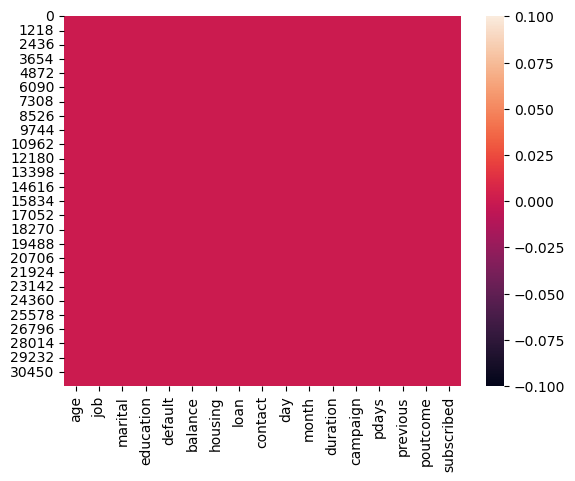

In [12]:
sns.heatmap(bank.isnull())

-- No null values in the given dataset

In [9]:
#Removing unwanted column - i.e ID feature
bank.drop('ID',axis = 1,inplace = True)

In [10]:
bank

age         job   marital  education default  balance housing loan  \
0       56      admin.   married    unknown      no     1933      no   no   
1       31     unknown   married  secondary      no        3      no   no   
2       27    services   married  secondary      no      891     yes   no   
3       57  management  divorced   tertiary      no     3287      no   no   
4       31  technician   married  secondary      no      119     yes   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
31642   29  management    single   tertiary      no        0     yes   no   
31643   53  management  divorced   tertiary      no      380      no  yes   
31644   32  management    single   tertiary      no      312      no   no   
31645   57  technician   married  secondary      no      225     yes   no   
31646   55  management  divorced  secondary      no      204     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0      telephone   19   nov        44         2     -1         0  unknown   
1       cellular   20   jul        91         2     -1         0  unknown   
2       cellular   18   jul       240         1     -1         0  unknown   
3       cellular   22   jun       867         1     84         3  success   
4       cellular    4   feb       380         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
31642   cellular   12   may       116         2     -1         0  unknown   
31643   cellular    5   jun       438         2     -1         0  unknown   
31644   cellular    7   aug        37         3     -1         0  unknown   
31645  telephone   15   may        22         7    337        12  failure   
31646   cellular   11   jul      1973         2     -1         0  unknown   

      subscribed  
0             no  
1             no  
2             no  
3            yes  
4             no  
...          ...  
31642         no  
31643        yes  
31644         no  
31645         no  
31646        yes  

[31647 rows x 17 columns]

In [13]:
#Checking for Duplicates
bank.duplicated().sum()

0

-- No duplicate values present in our dataset..

In [14]:
#Checking for dataset info
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [15]:
#Checking the number of unique values of each column
bank.nunique()

age             76
job             12
marital          3
education        4
default          2
balance       6326
housing          2
loan             2
contact          3
day             31
month           12
duration      1454
campaign        45
pdays          509
previous        38
poutcome         4
subscribed       2
dtype: int64

In [16]:
#Now we split the data into numerical and categorical columns
cat_col = []
for i in bank.dtypes.index:
    if bank.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical Variables: ",cat_col)

Categorical Variables:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


In [17]:
num_col = []
for i in bank.dtypes.index:
    if bank.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Variables: ",num_col)

Numerical Variables:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [19]:
#Checking unique variables in categorical columns
for i in cat_col:
    print(f"Categories in {i} variable: ",end=" ")
    print(bank[i].unique())

Categories in job variable:  ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
Categories in marital variable:  ['married' 'divorced' 'single']
Categories in education variable:  ['unknown' 'secondary' 'tertiary' 'primary']
Categories in default variable:  ['no' 'yes']
Categories in housing variable:  ['no' 'yes']
Categories in loan variable:  ['no' 'yes']
Categories in contact variable:  ['telephone' 'cellular' 'unknown']
Categories in month variable:  ['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
Categories in poutcome variable:  ['unknown' 'success' 'failure' 'other']
Categories in subscribed variable:  ['no' 'yes']


## Univariate Analysis 

In [20]:
#Checking statistical info for numerical columns
bank.describe()

age        balance           day      duration      campaign  \
count  31647.000000   31647.000000  31647.000000  31647.000000  31647.000000   
mean      40.957247    1363.890258     15.835466    258.113534      2.765697   
std       10.625134    3028.304293      8.337097    257.118973      3.113830   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      73.000000      8.000000    104.000000      1.000000   
50%       39.000000     450.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    318.500000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  31647.000000  31647.000000  
mean      39.576042      0.574272  
std       99.317592      2.422529  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

-- As we can see from the above data, there are presence of outliers but they seem to be realistic and not necessarily needed to be treated(just an assumption)..we shall analyse this bit later in the feature engineering part...

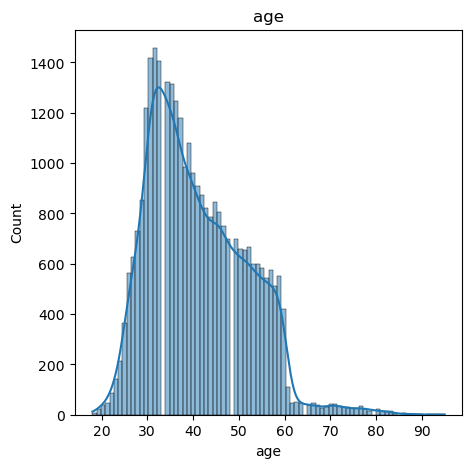

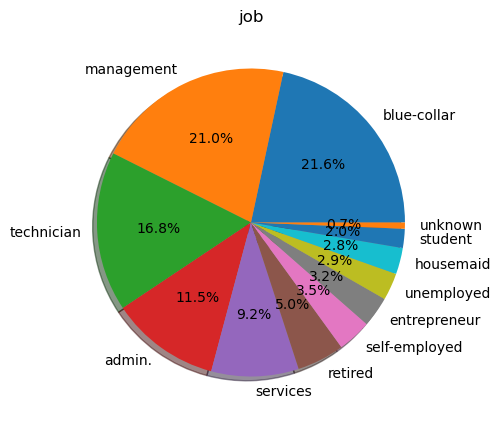

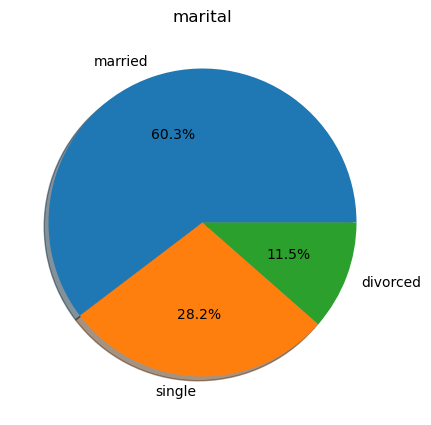

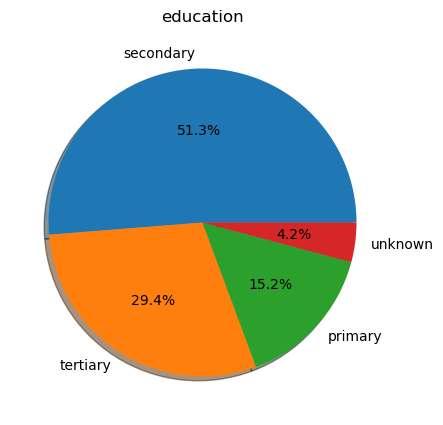

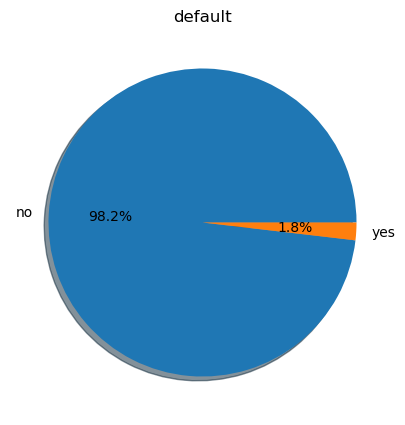

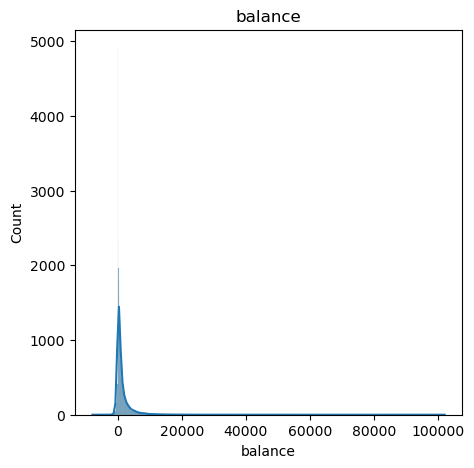

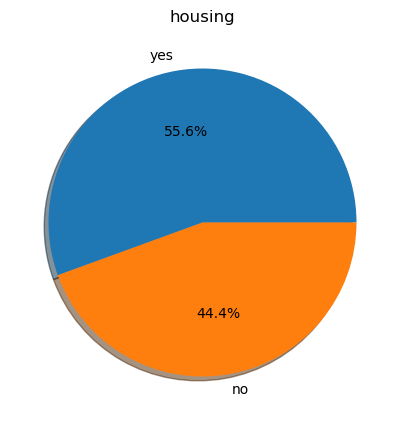

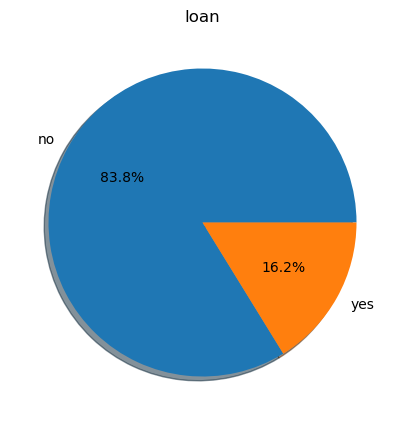

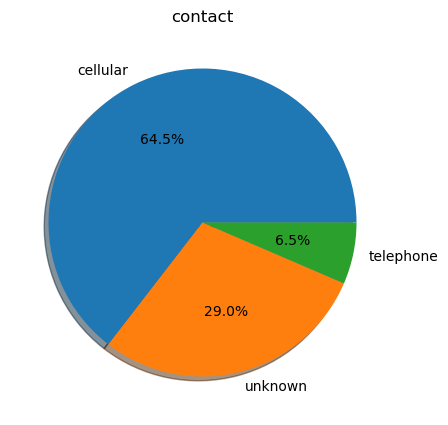

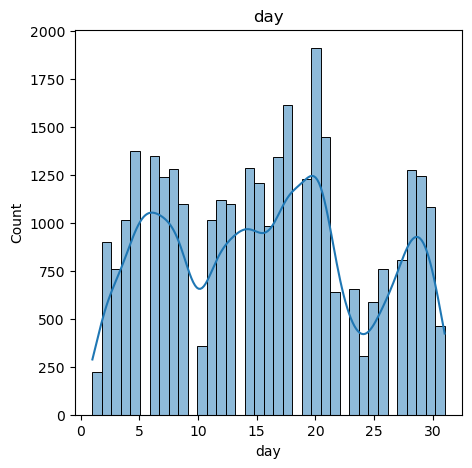

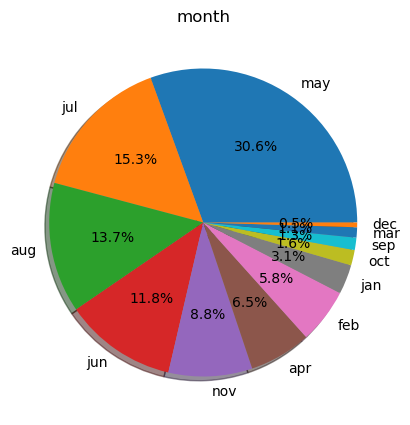

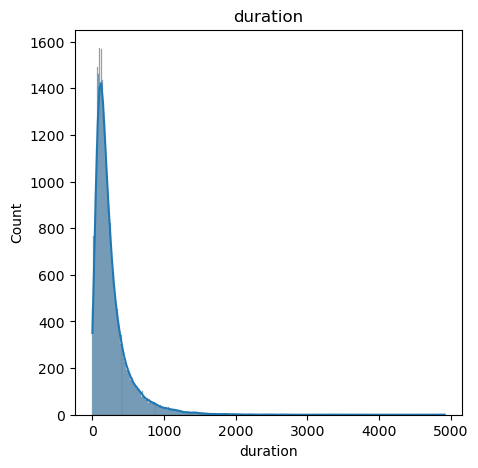

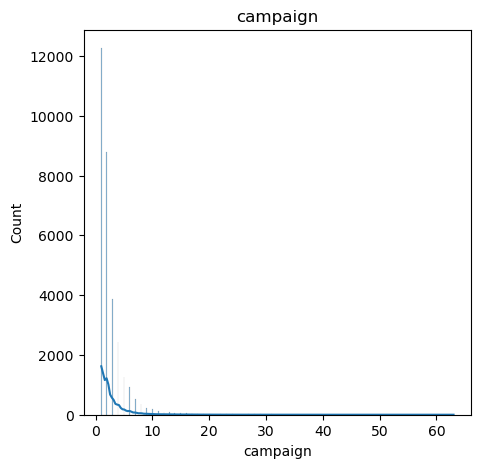

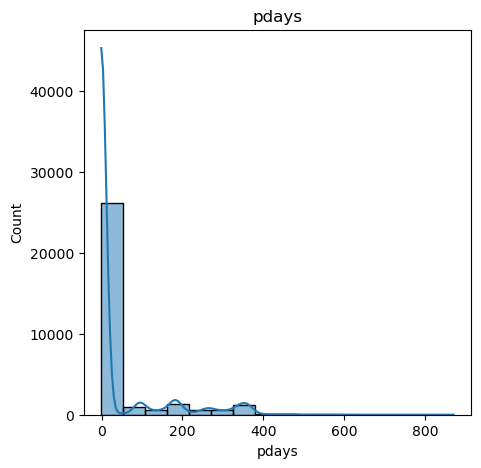

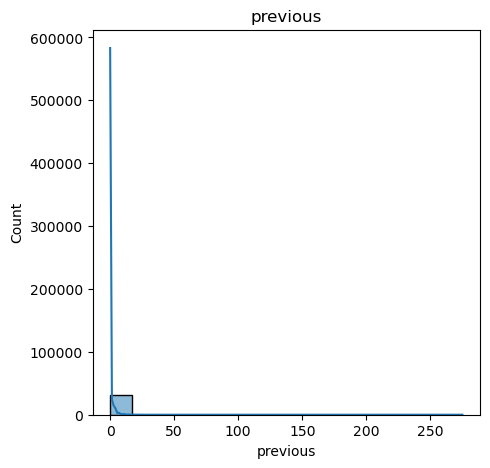

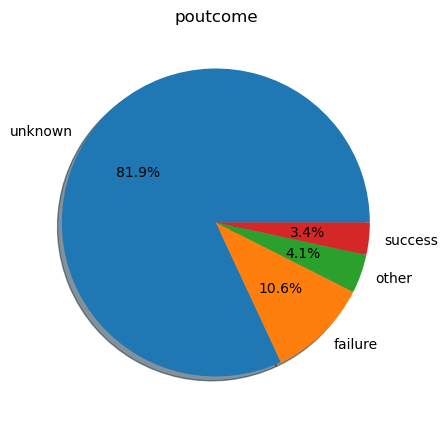

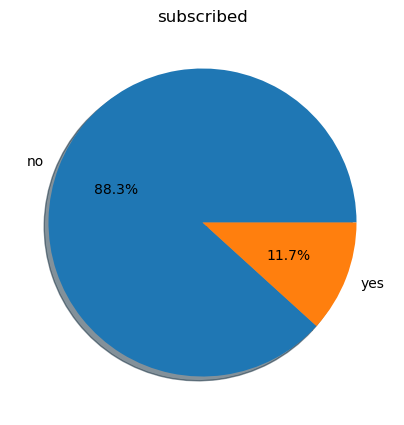

In [21]:
# Analysing each column
for column in bank:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if bank[column].dtypes != "object":
        sns.histplot(x = column,data = bank,kde=True)
    elif bank[column].dtypes == "object":
        sizes = bank[column].value_counts()
        plt.pie(sizes.values,labels=sizes.index,autopct = '%1.1f%%',shadow=True)

-- Take-aways:

1) Clients with blue-collar job type are the ones who are contacted for the subscription, followed by management job type and so on..
2) Clients with marital status as 'married' are the most contacted..
3) Clients with 'primary' education are the most contacted rather than 'tertiory' level of education..
4) Clients with House loan are the ones contacted the most..and the clients not having Personal loan are the ones contacted rather than having a Personal loan..
5) Majority of the Clients are contacted through 'Cellular' mode of communication..
5) Most of the clients are contacted mostly in the months of May, June and August..
6) Moving to the numerical columns:
     Age and Days are the only columns which are almost distributed normally..whereas other numerical columns are heavily skewed to the left..

## Bivariate Analysis 

In [37]:
# Relationship between Categorical features and dependent feature
categorical_features = [feature for feature in bank.columns if ((bank[feature].dtypes=='O') and (feature not in ['subscribed']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

<Figure size 1500x3000 with 0 Axes>

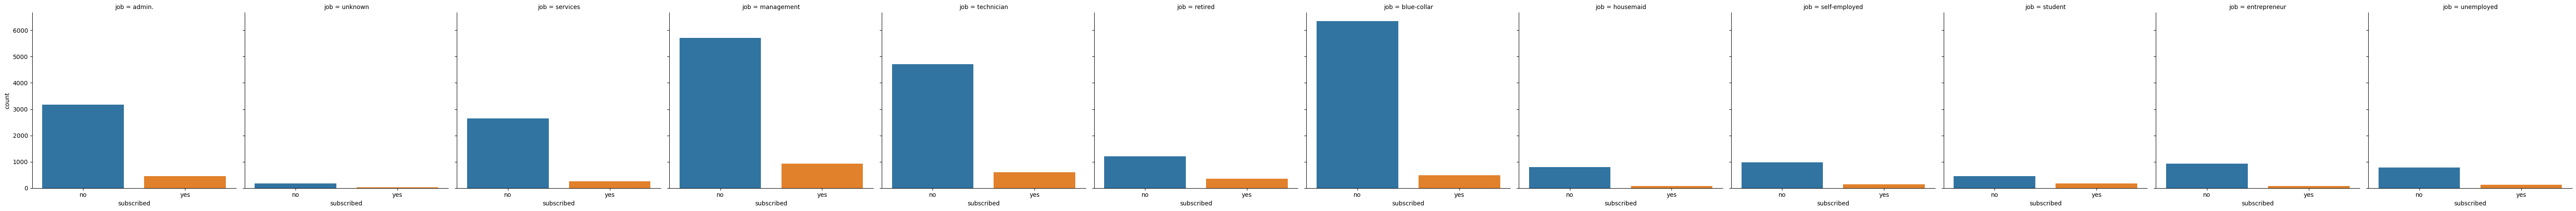

<Figure size 1500x3000 with 0 Axes>

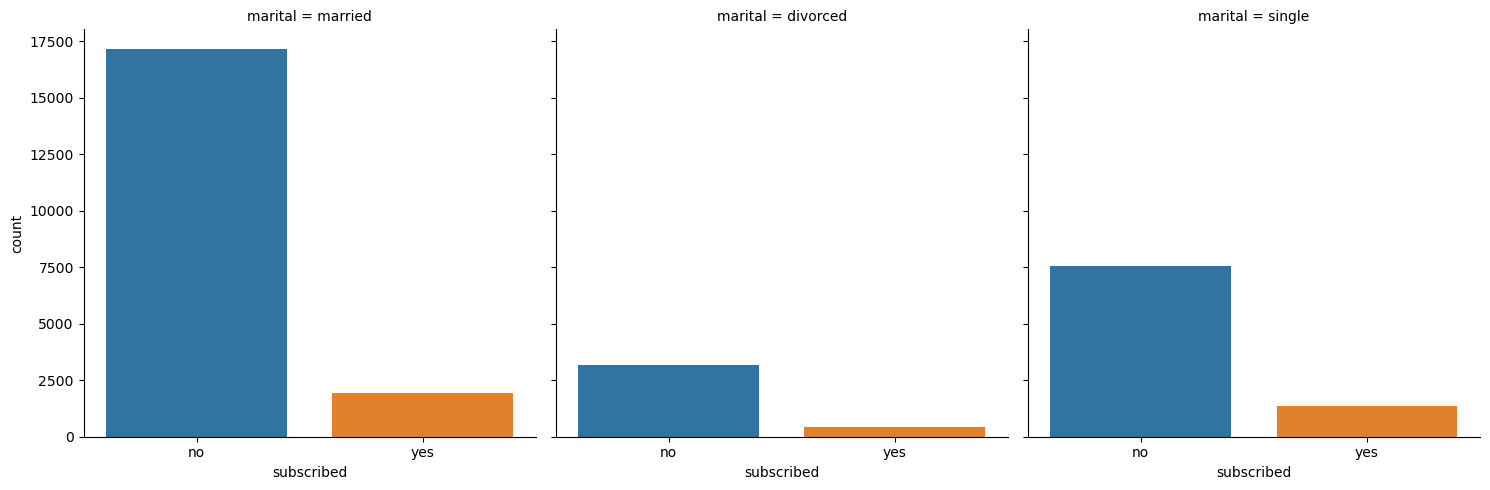

<Figure size 1500x3000 with 0 Axes>

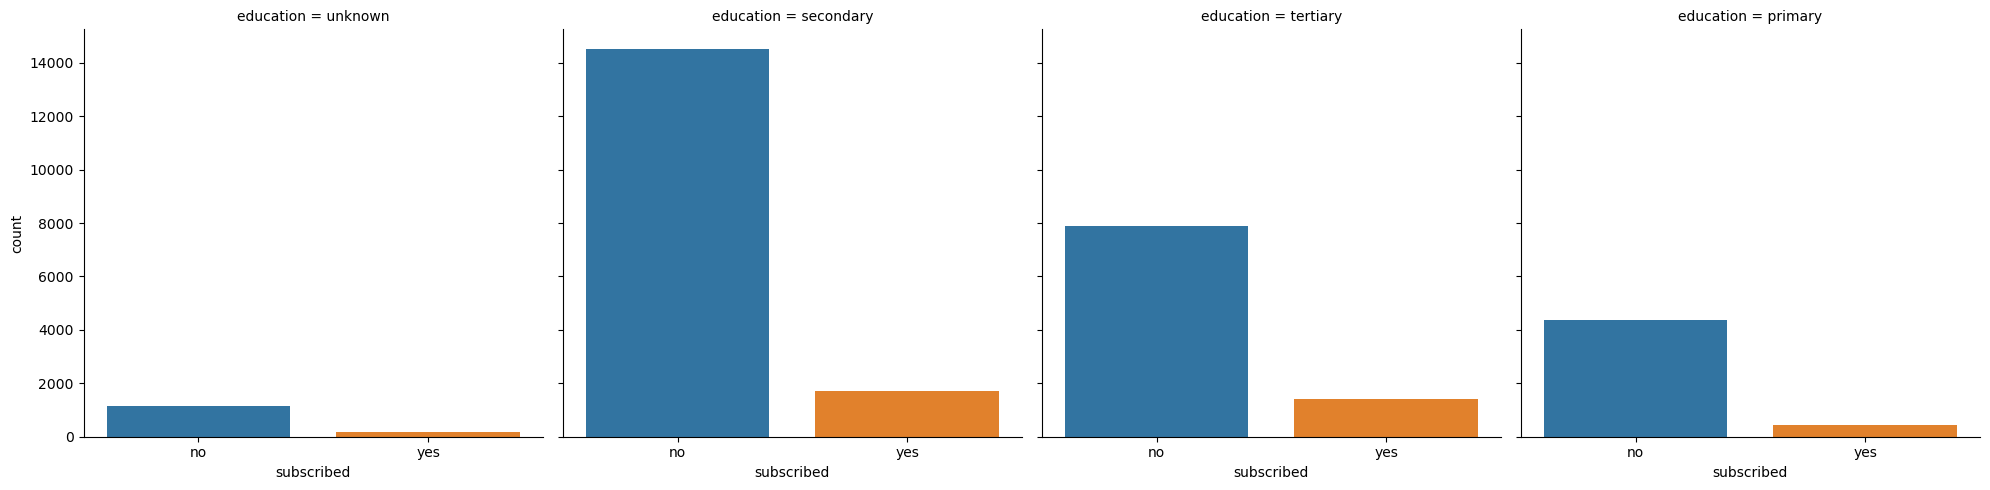

<Figure size 1500x3000 with 0 Axes>

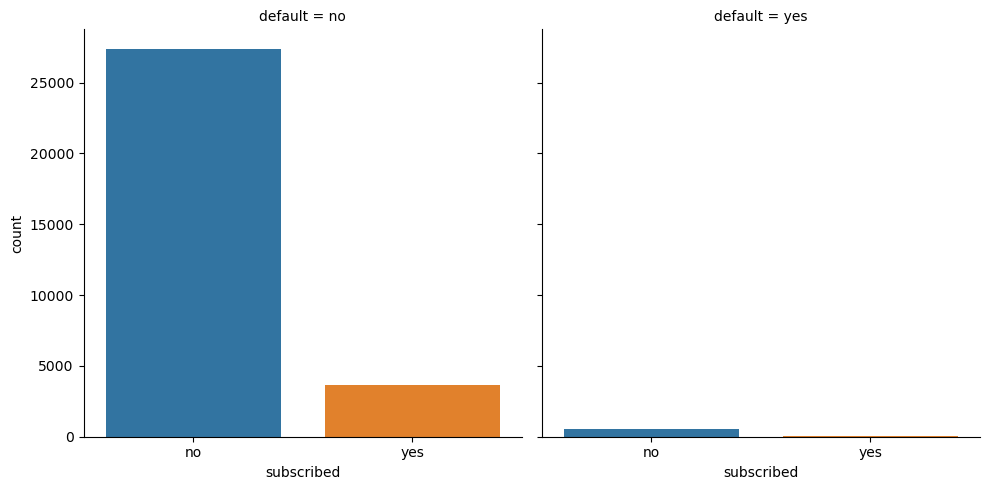

<Figure size 1500x3000 with 0 Axes>

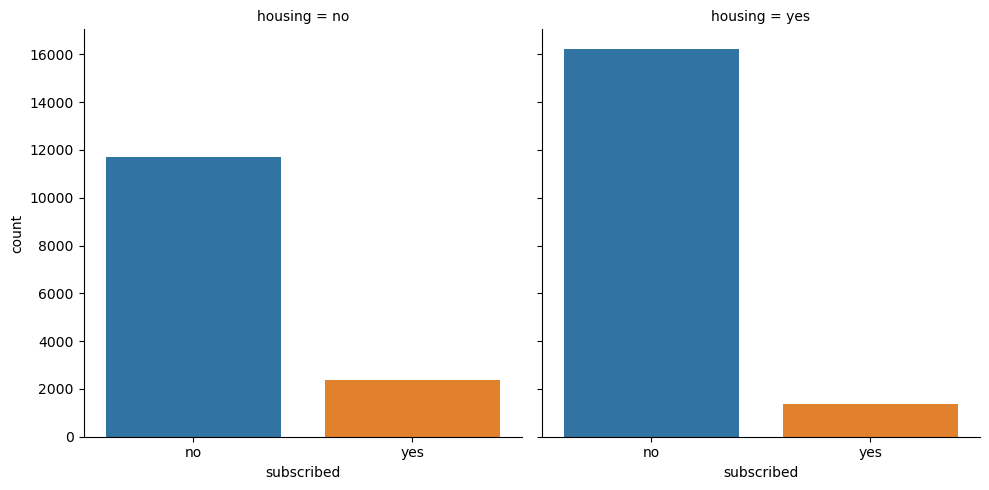

<Figure size 1500x3000 with 0 Axes>

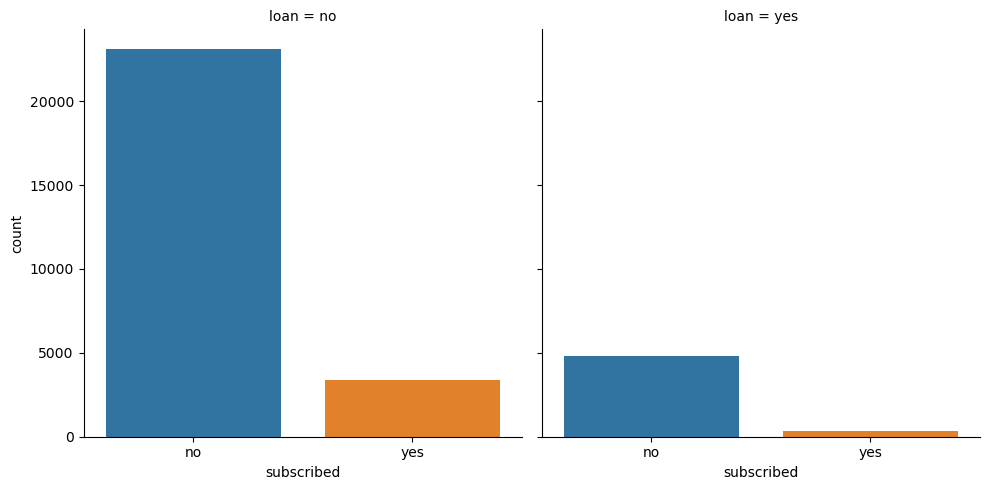

<Figure size 1500x3000 with 0 Axes>

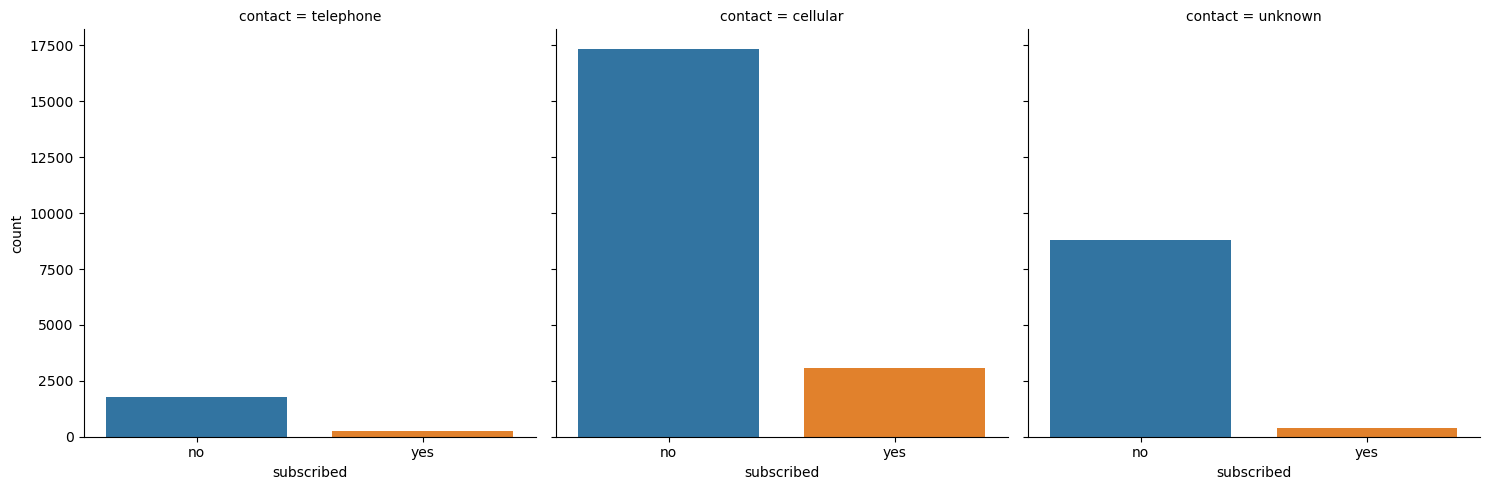

<Figure size 1500x3000 with 0 Axes>

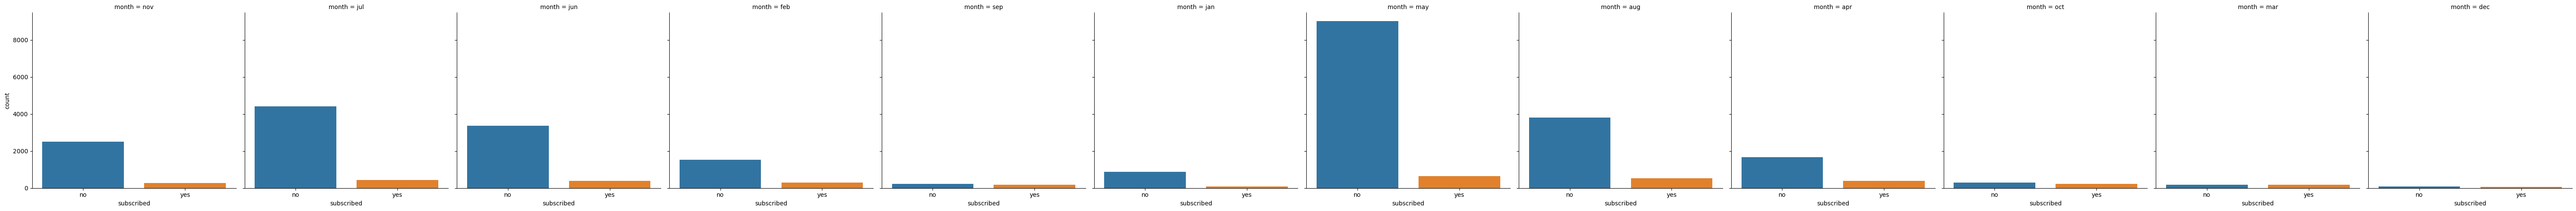

<Figure size 1500x3000 with 0 Axes>

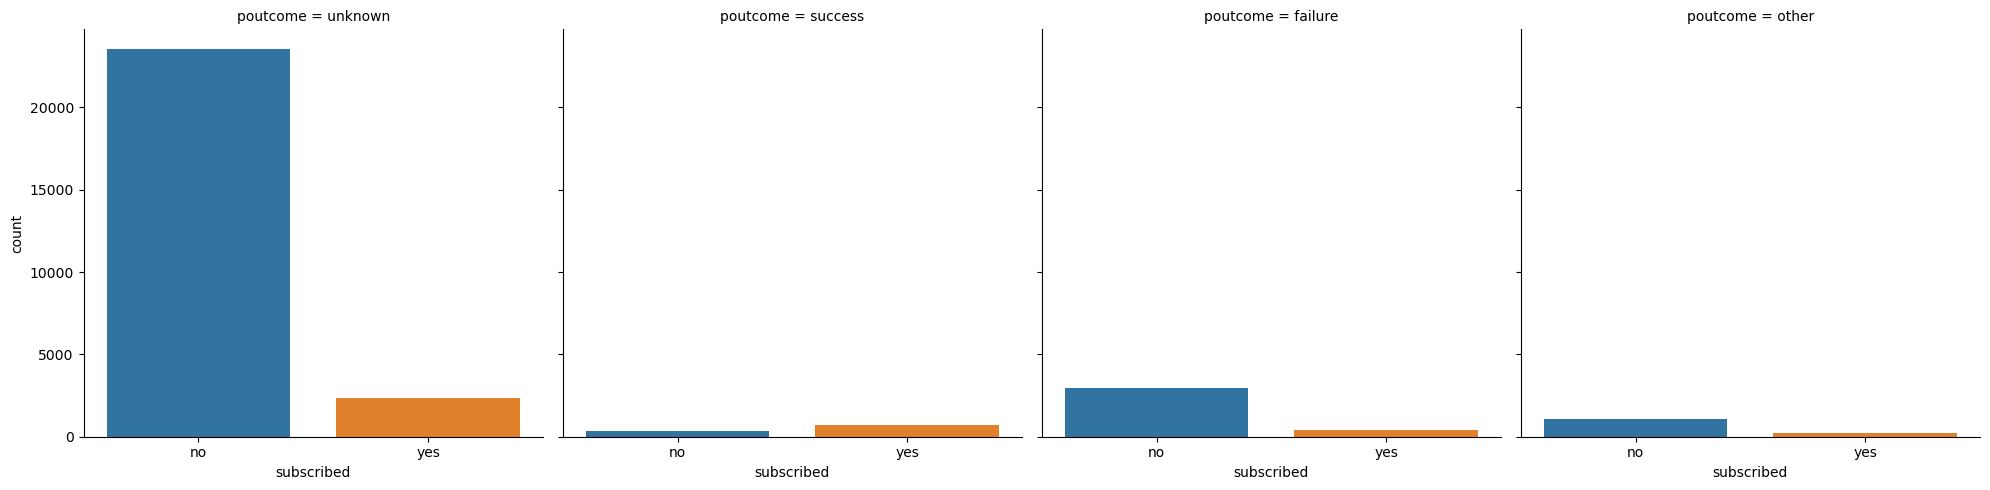

In [33]:
for categorical_feature in categorical_features:
    plt.figure(figsize=(15,30))
    sns.catplot(x='subscribed',col=categorical_feature,kind='count',data = bank)
plt.show()

In [35]:
for categorical_feature in categorical_features:
    print(bank.groupby(['subscribed',categorical_feature]).size())

subscribed  job          
no          admin.           3179
            blue-collar      6353
            entrepreneur      923
            housemaid         795
            management       5716
            retired          1212
            self-employed     983
            services         2649
            student           453
            technician       4713
            unemployed        776
            unknown           180
yes         admin.            452
            blue-collar       489
            entrepreneur       85
            housemaid          79
            management        923
            retired           362
            self-employed     140
            services          254
            student           182
            technician        594
            unemployed        129
            unknown            26
dtype: int64
subscribed  marital 
no          divorced     3185
            married     17176
            single       7571
yes         divorced      445
    

--Take-aways:

1) Highest count who have opted for subscription (job type) - management job type
2) Highest count who have opted for subscription (marital) - married (although single marital status have better yes to no ratio than married marital status)
3) Highest count who have opted for subscription (education) - secondary (although tertiory educated level clients have better yes to no ratio than secondary educated level clients)
4) Highest count who have opted for subscription (house loan) - Clients who does not have a housing loan have a higher count for subscription than Clients who has housing loan..
5) Highest count who have opted for subscription (Personal loan) - Clients who does not have a Personal loan have a higher count for subscription than Clients who has Personal loan..
6) Highest count who have opted for subscription (contact) - Cellular form of communication
7) Highest count who have opted for subscription (month) - Months of May,July and August have highest counts for the subscription of term deposit..

In [36]:
#Relationship between Numerical features and dependent feature
# Relationship between Categorical features and dependent feature
numerical_features = [feature for feature in bank.columns if ((bank[feature].dtypes !='O') and (feature not in ['subscribed']))]
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

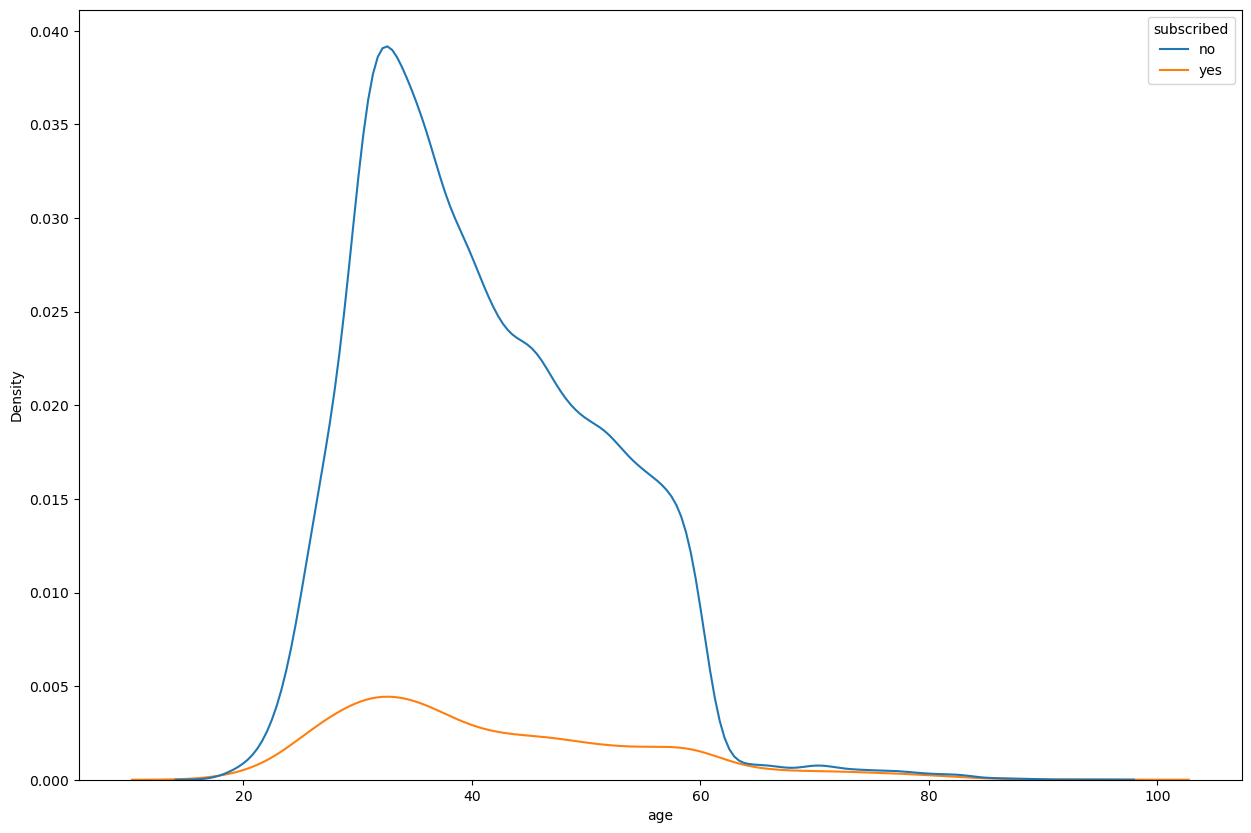

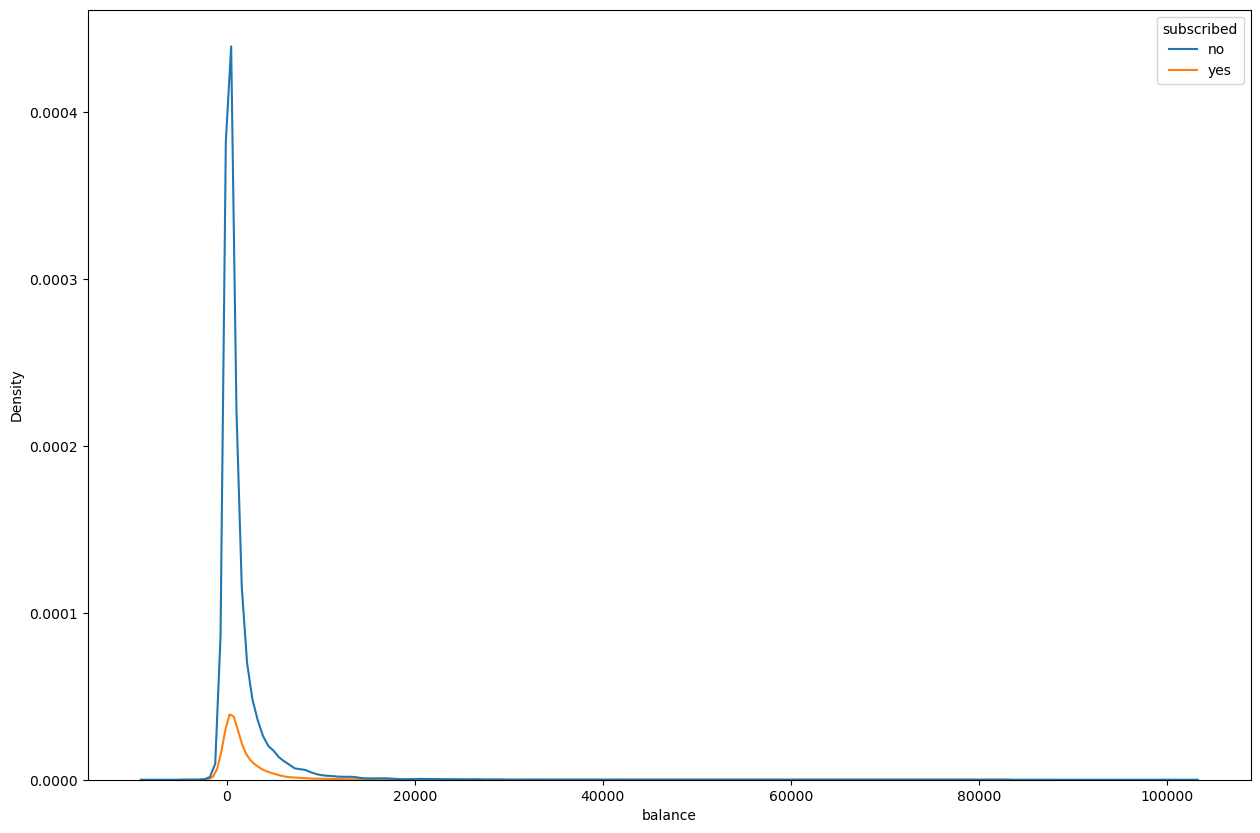

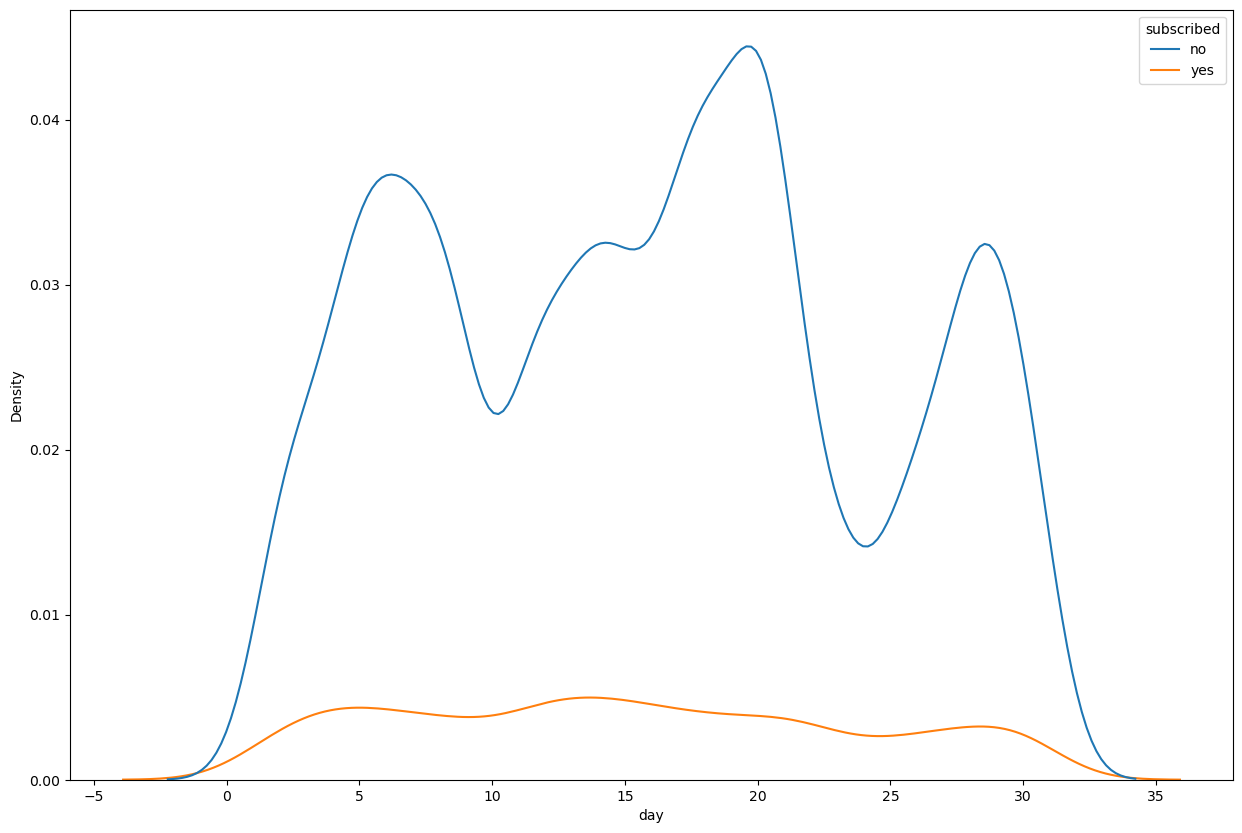

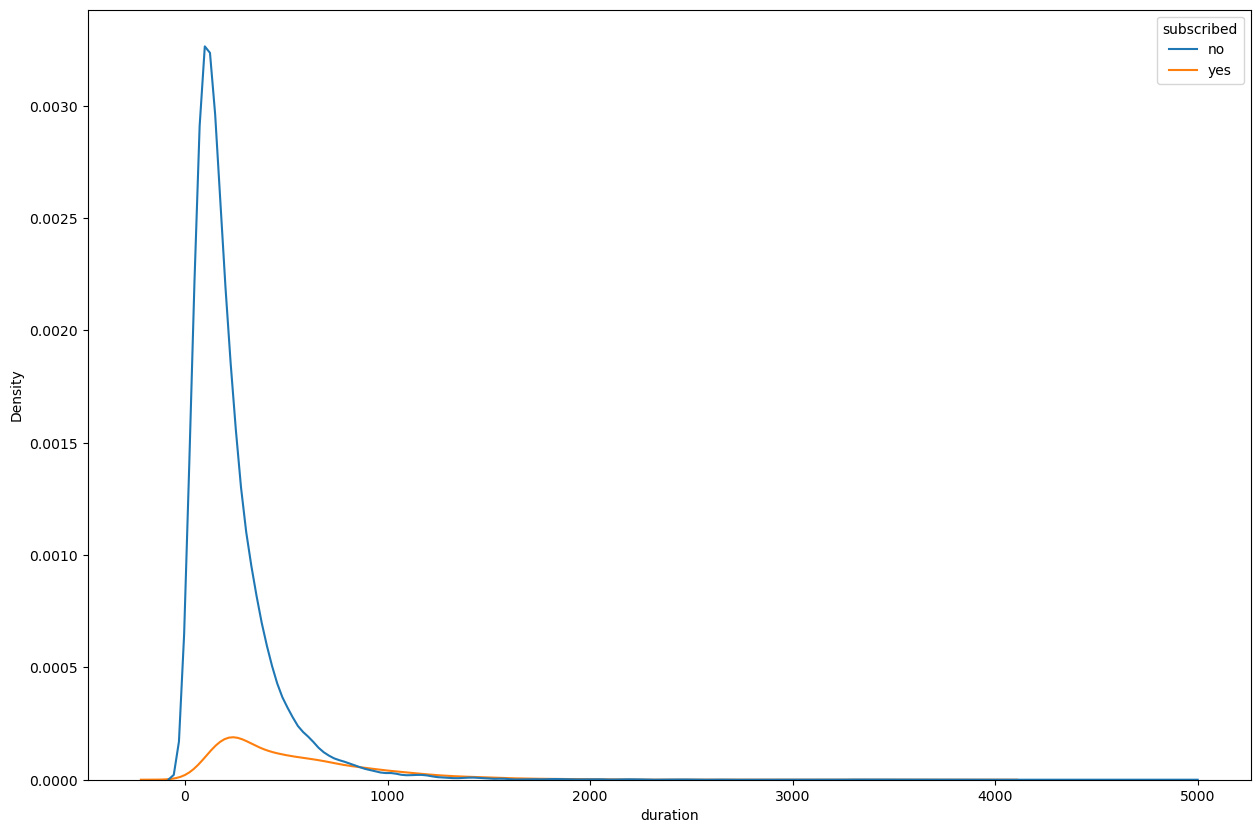

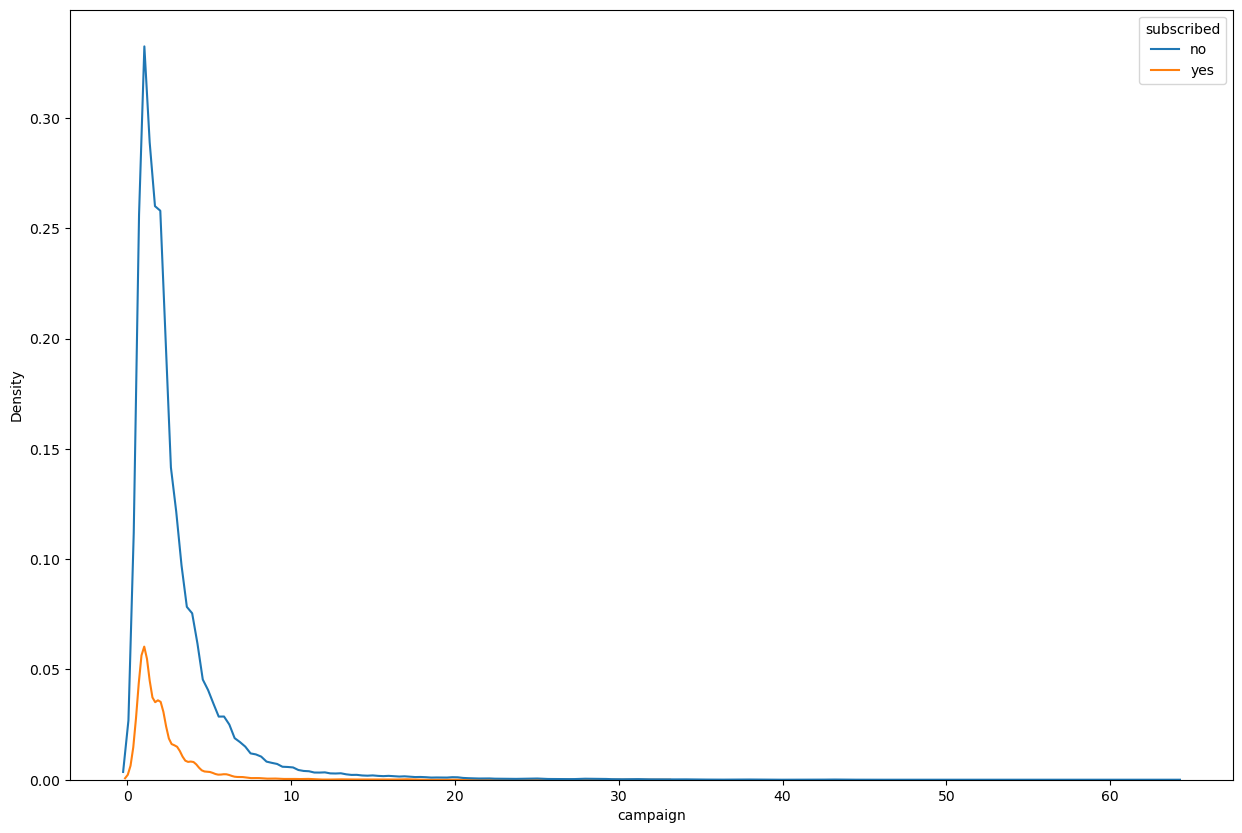

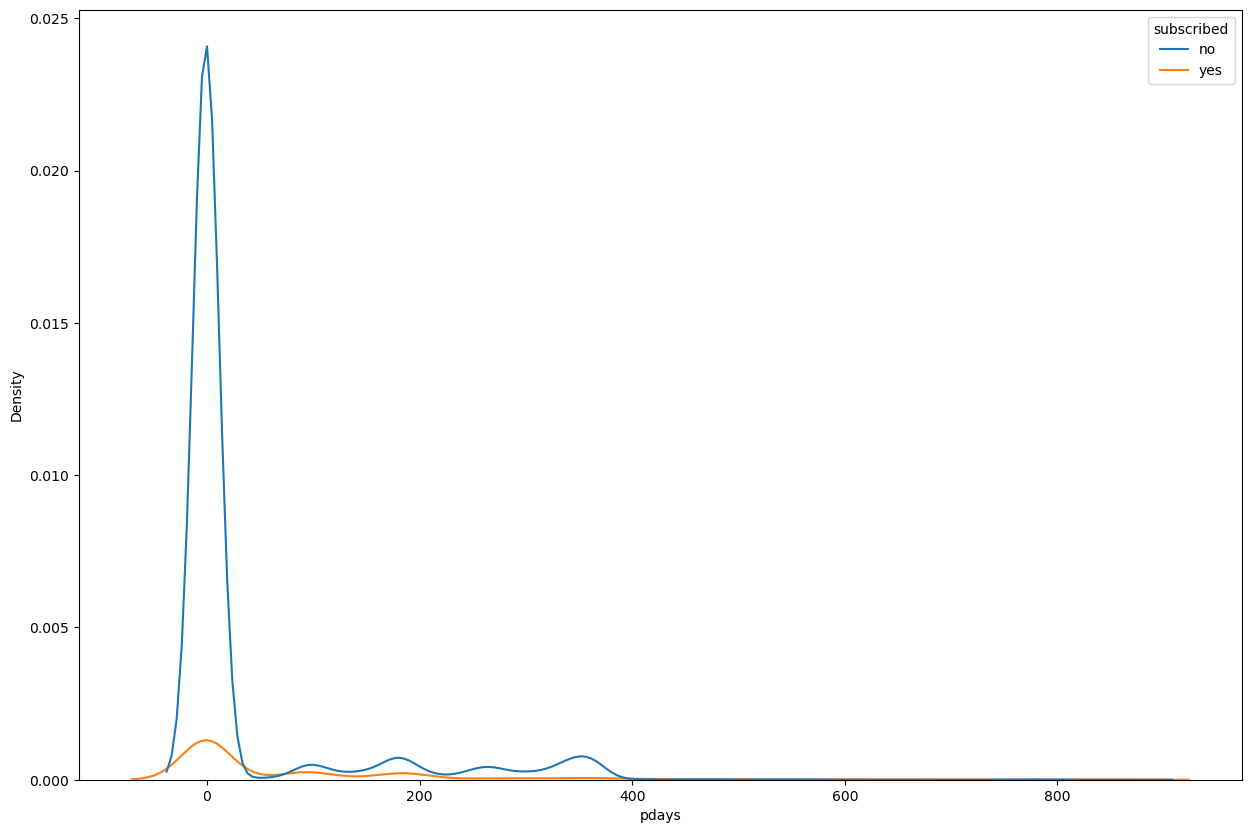

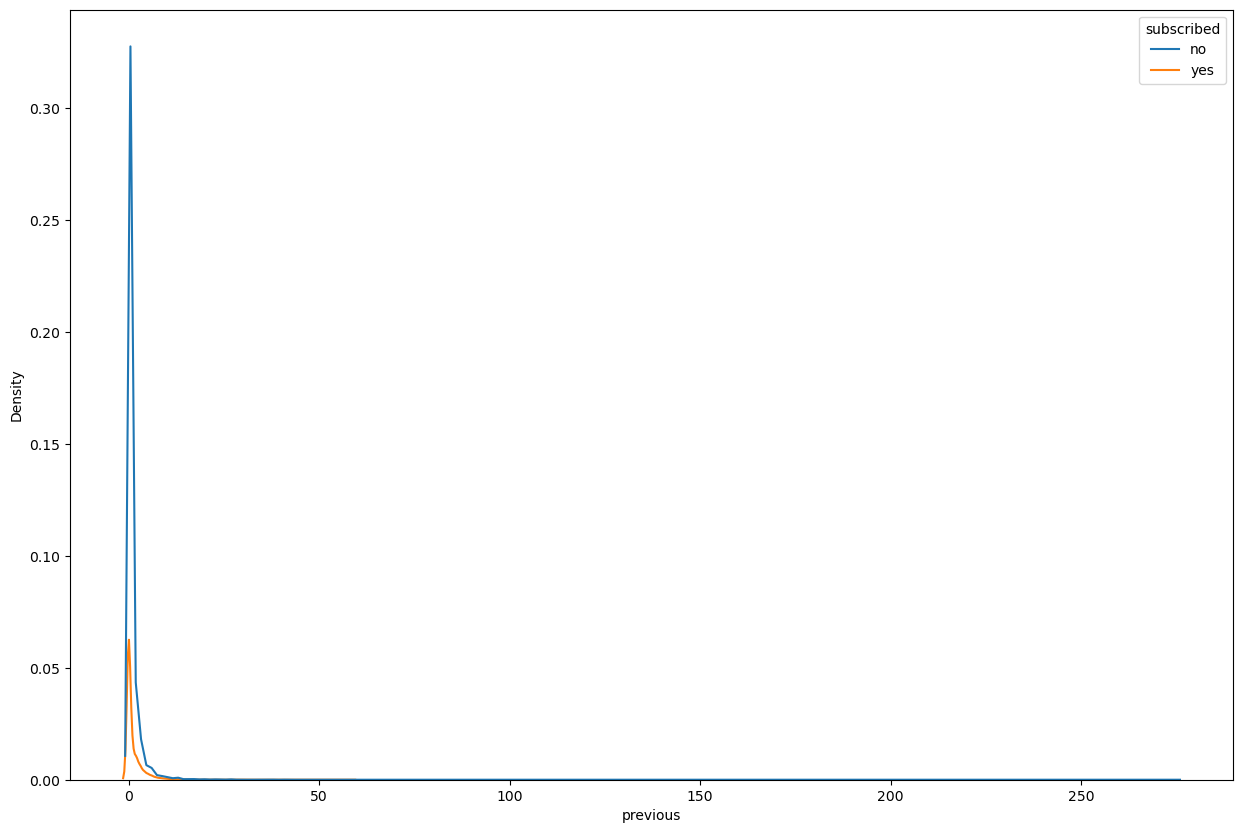

In [44]:
for numerical_feature in numerical_features:
    plt.figure(figsize=(15,10))
    sns.kdeplot(x=numerical_feature,data = bank,hue='subscribed')
plt.show()

## Multivariate Analysis 

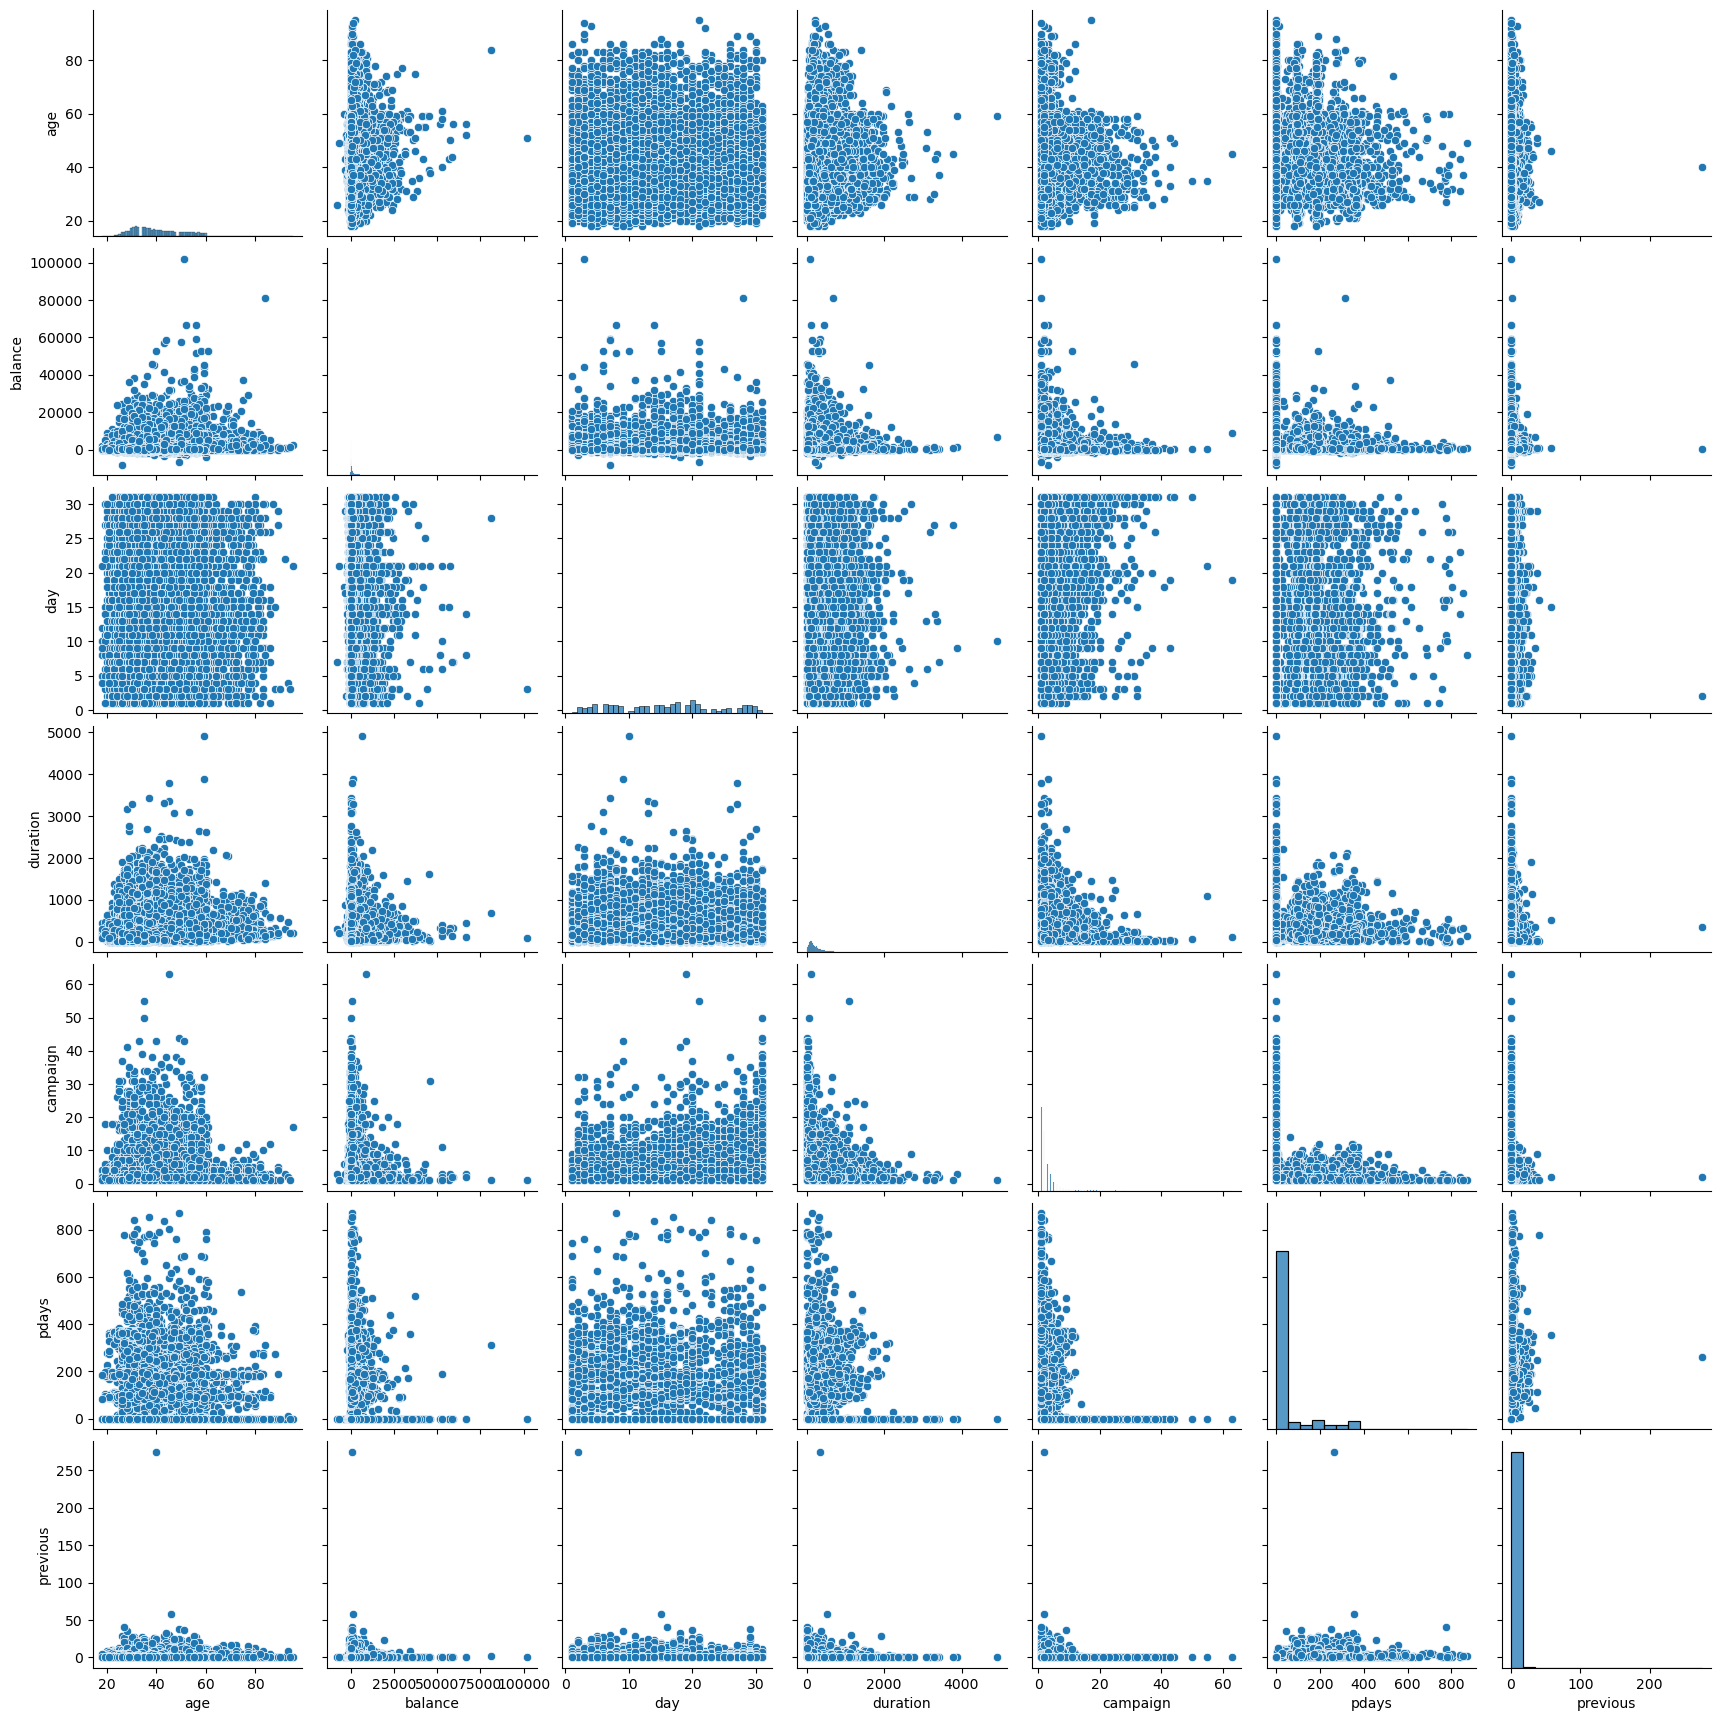

In [46]:
sns.pairplot(bank)

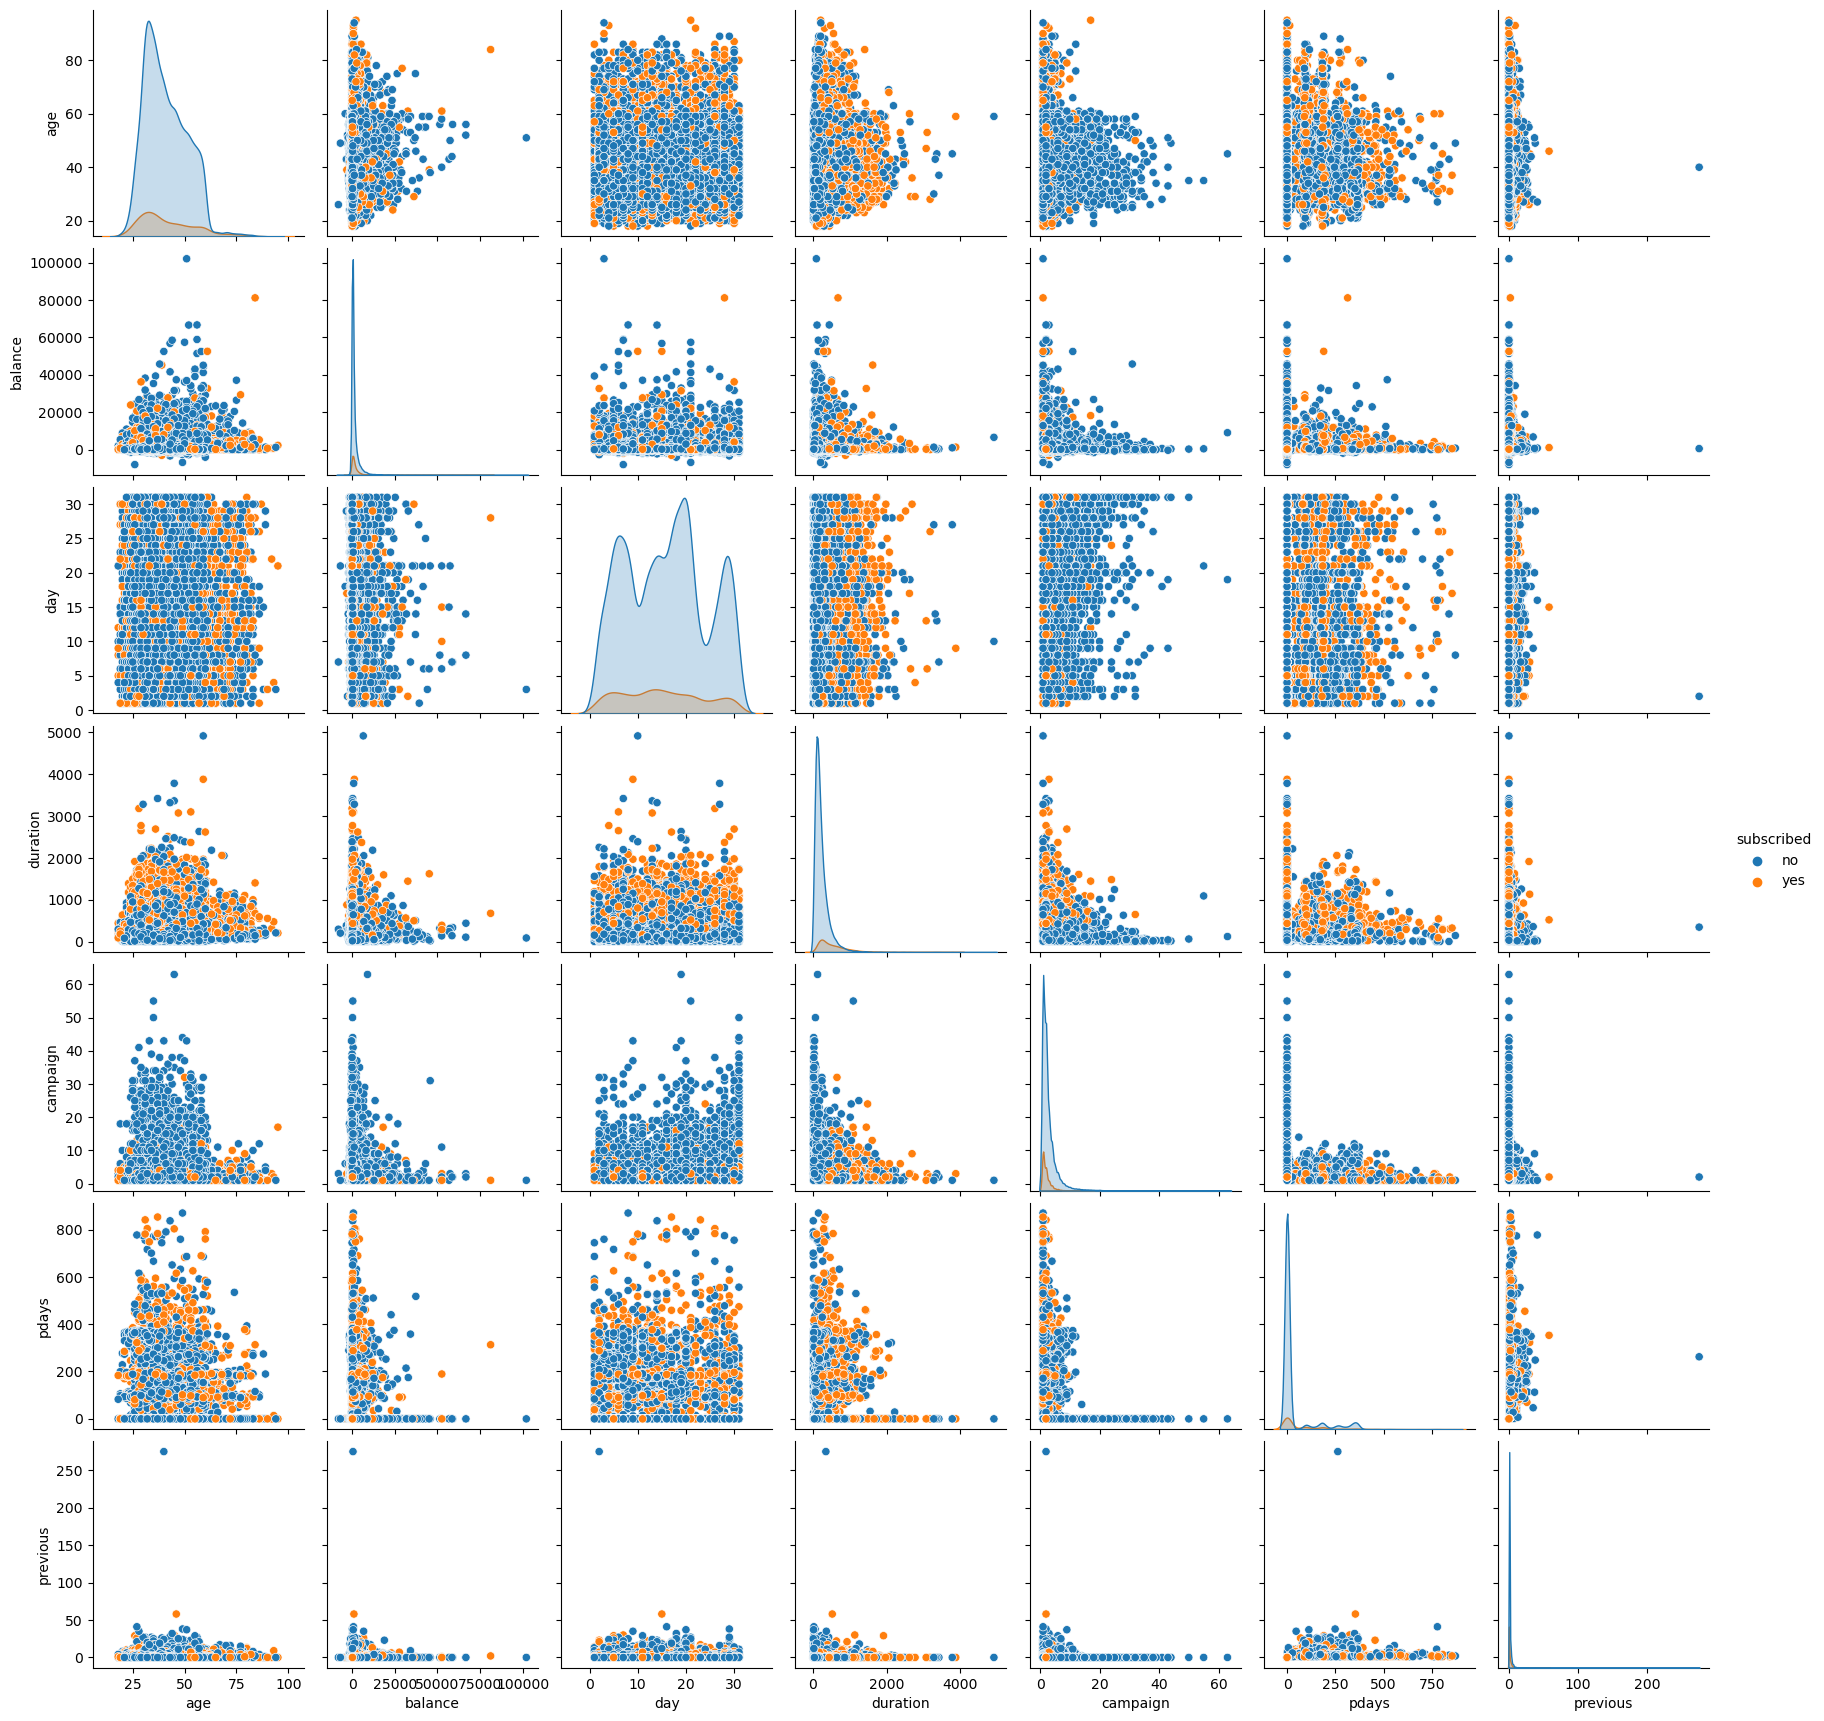

In [47]:
sns.pairplot(bank,hue = 'subscribed')

## Feature Engineering and Feature Selection 

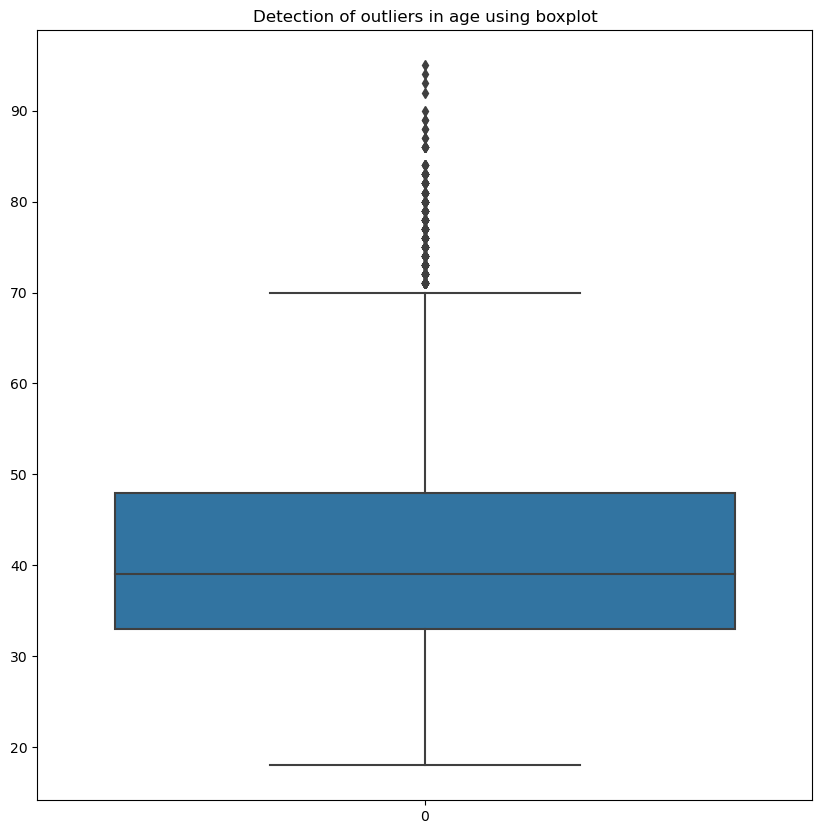

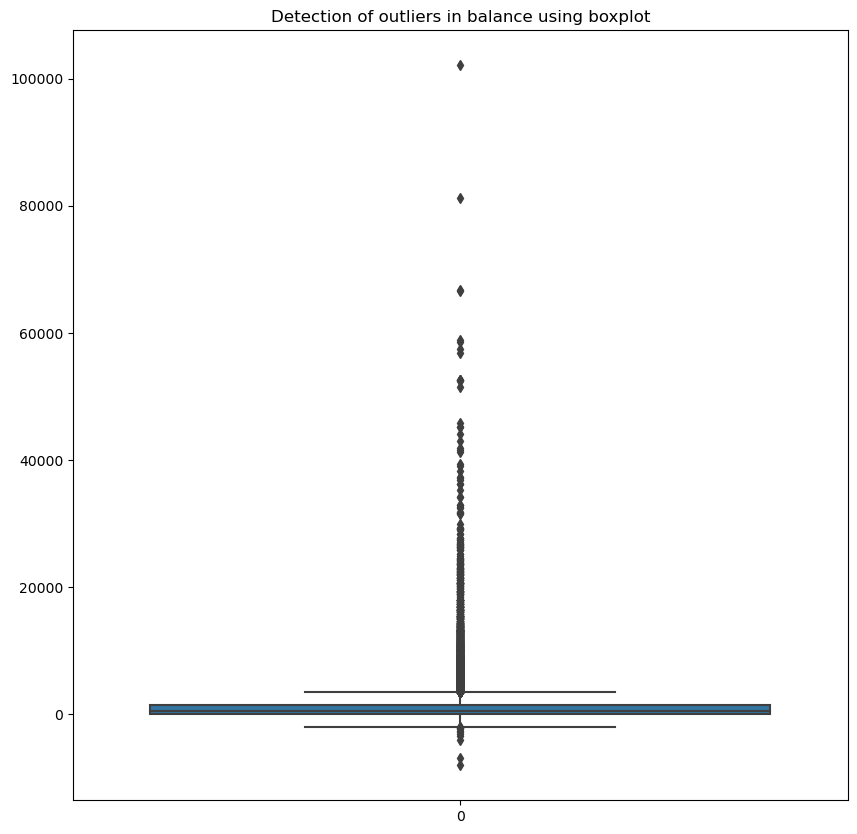

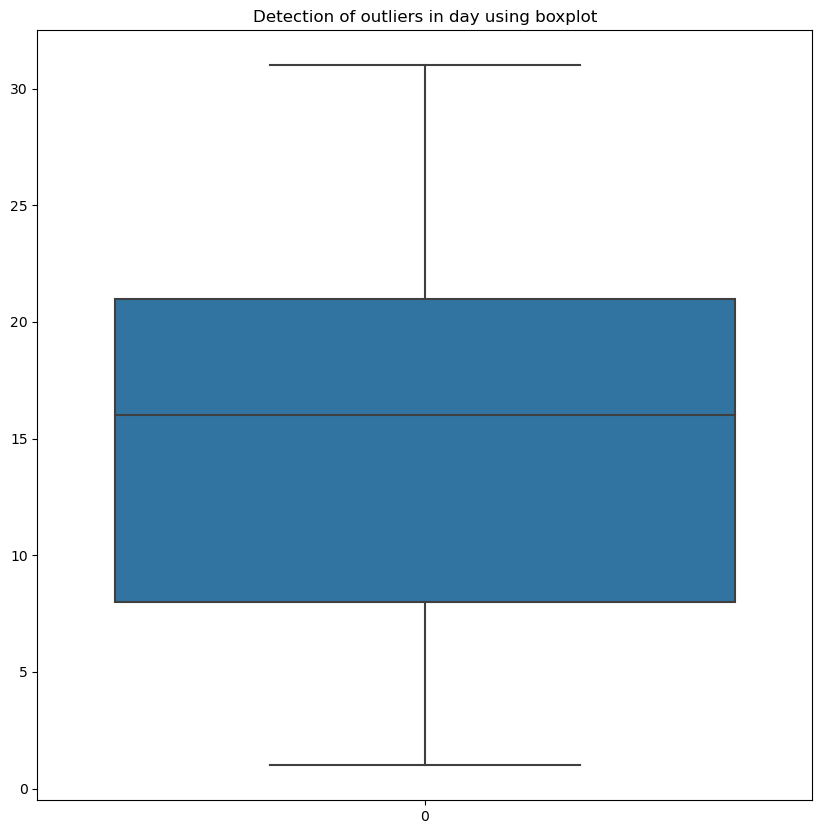

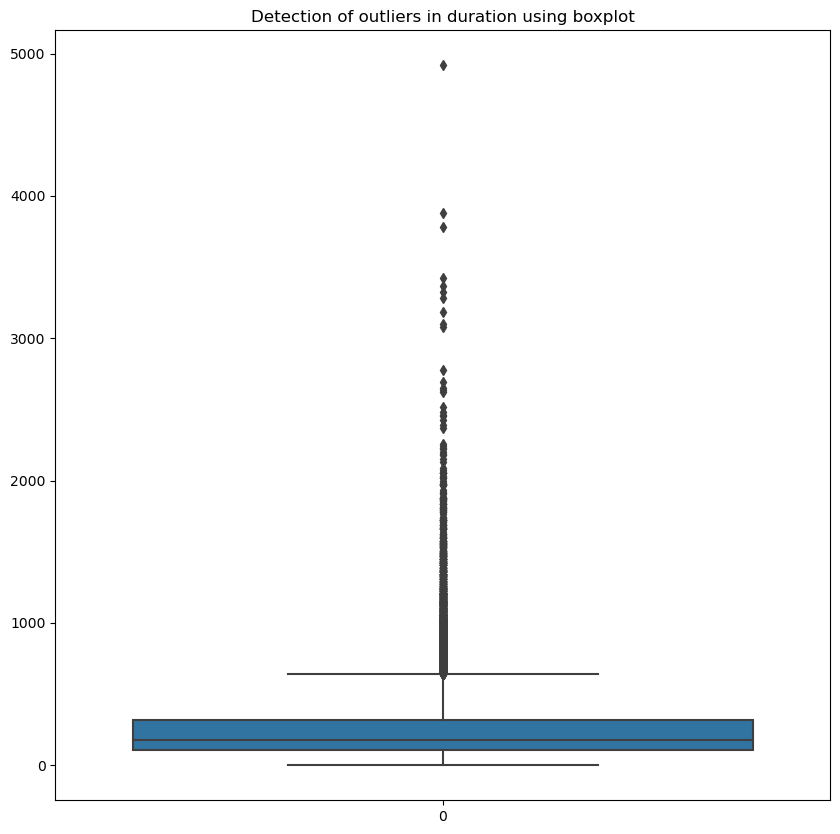

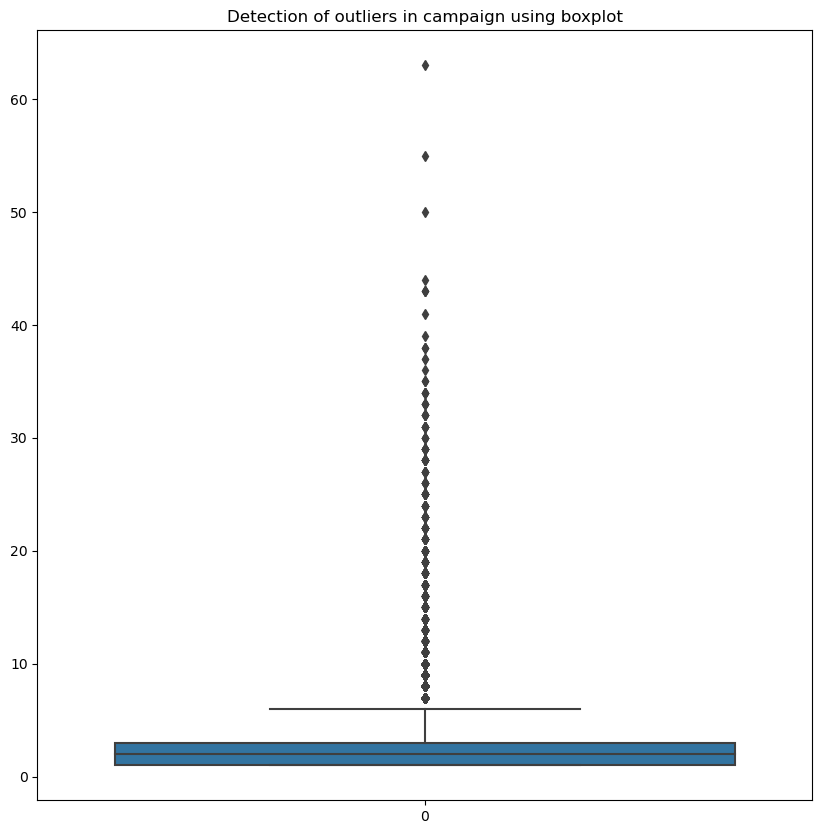

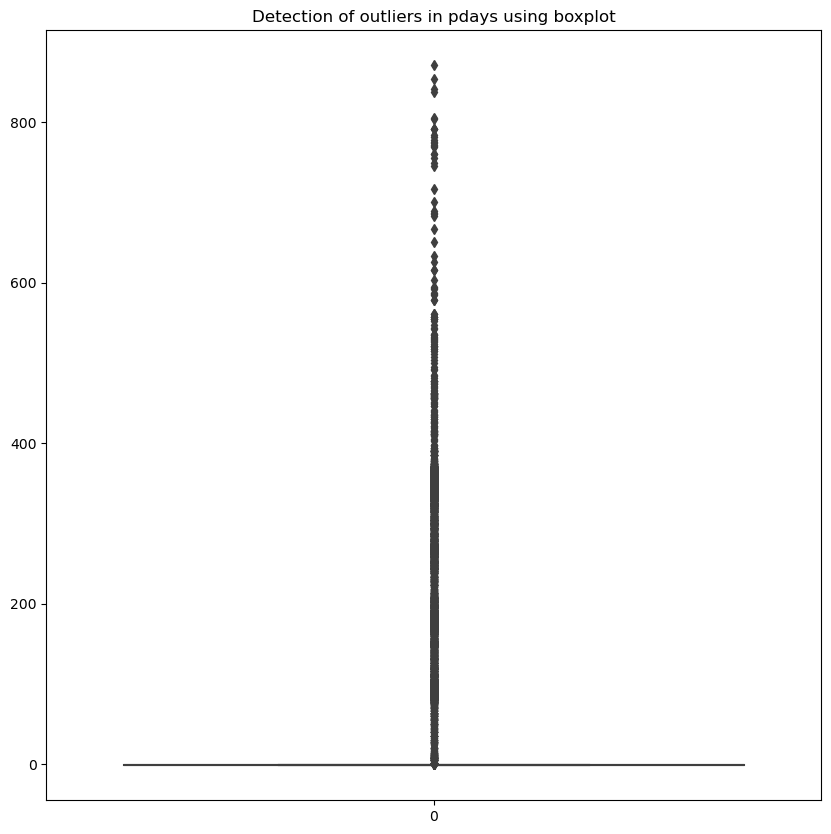

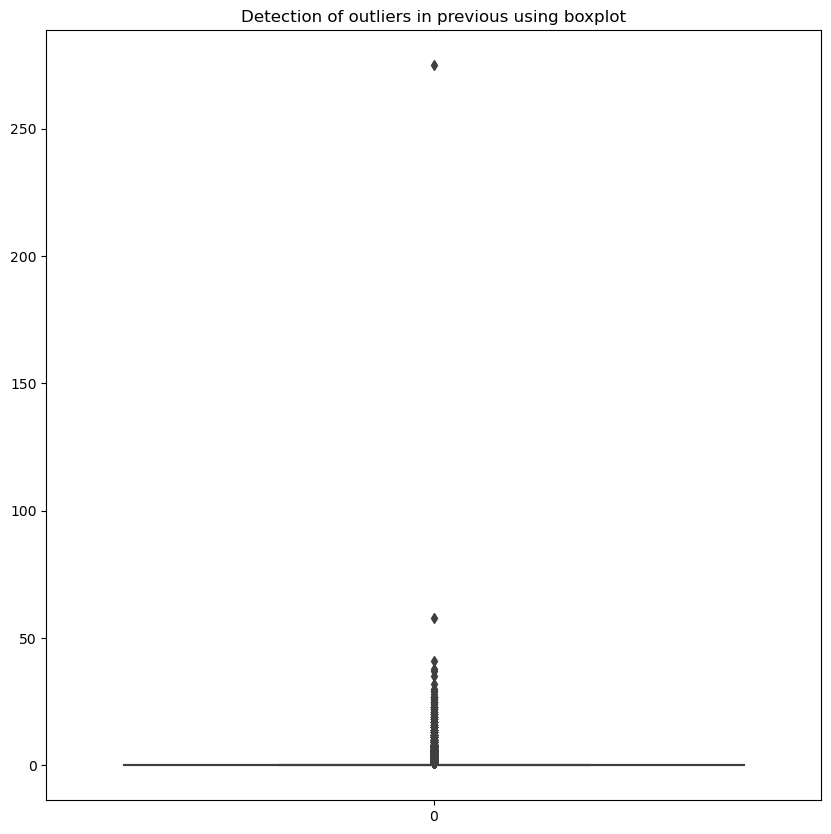

In [49]:
##Checking for outliers using boxplots and removing them if necessary
for numerical_feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(bank[numerical_feature])
    plt.title('Detection of outliers in {} using boxplot'.format(numerical_feature))
plt.show()

In [50]:
bank.groupby(['subscribed','age']).size()

subscribed  age
no          18      3
            19     15
            20     25
            21     33
            22     61
                   ..
yes         87      1
            90      1
            92      1
            93      1
            95      1
Length: 145, dtype: int64

In [51]:
bank.groupby(['subscribed','balance']).size()

subscribed  balance
no          -8019      1
            -6847      1
            -4057      1
            -3372      1
            -2712      1
                      ..
yes          32685     1
             36252     1
             45248     1
             52587     2
             81204     1
Length: 7969, dtype: int64

In [52]:
bank.groupby(['subscribed','duration']).size()

subscribed  duration
no          0            1
            2            3
            3            3
            4           11
            5           20
                        ..
yes         2775         1
            3076         1
            3102         1
            3183         1
            3881         1
Length: 2381, dtype: int64

In [56]:
bank.groupby(['subscribed','campaign'],sort=True)['campaign'].count()

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
                        ...  
yes         16              2
            17              6
            20              1
            24              1
            32              1
Name: campaign, Length: 65, dtype: int64

In [54]:
bank.groupby(['subscribed','pdays']).size()

subscribed  pdays
no          -1       23553
             1           6
             2          24
             4           1
             5           7
                     ...  
yes          792         1
             804         1
             805         1
             842         1
             854         1
Length: 804, dtype: int64

In [57]:
# Removing the 'pdays' feature as the not subscribed count is very high and has many outliers
bank.drop(['pdays'],axis=1,inplace=True)

In [55]:
bank.groupby(['subscribed','previous']).size()

subscribed  previous
no          0           23553
            1            1499
            2            1154
            3             580
            4             382
            5             227
            6             128
            7             102
            8              56
            9              46
            10             33
            11             38
            12             25
            13             22
            14              9
            15             15
            16              8
            17              8
            18              5
            19              7
            20              5
            21              3
            22              3
            23              5
            24              2
            25              4
            26              1
            27              4
            28              1
            29              1
            32              1
            35              1
            37     

In [65]:
#Removing outliers from 'campaign' and 'previous' features
from scipy.stats import zscore
z_scores_column1 = zscore(bank['previous'])
z_scores_column2 = zscore(bank['campaign'])
threshold=3
outliers = (abs(z_scores_column1)<threshold) & (abs(z_scores_column2)<threshold)
bank_1 = bank[outliers]

In [142]:
bank_1

age         job   marital  education  balance    contact  day month  \
0       56      admin.   married    unknown     1933  telephone   19   nov   
1       31     unknown   married  secondary        3   cellular   20   jul   
2       27    services   married  secondary      891   cellular   18   jul   
3       57  management  divorced   tertiary     3287   cellular   22   jun   
4       31  technician   married  secondary      119   cellular    4   feb   
...    ...         ...       ...        ...      ...        ...  ...   ...   
31641   37  technician    single   tertiary     1309    unknown    6   jun   
31642   29  management    single   tertiary        0   cellular   12   may   
31643   53  management  divorced   tertiary      380   cellular    5   jun   
31644   32  management    single   tertiary      312   cellular    7   aug   
31646   55  management  divorced  secondary      204   cellular   11   jul   

       duration  campaign  previous poutcome  housing_new  loan_new  \
0            44         2         0  unknown            0         0   
1            91         2         0  unknown            0         0   
2           240         1         0  unknown            1         0   
3           867         1         3  success            0         0   
4           380         1         0  unknown            1         0   
...         ...       ...       ...      ...          ...       ...   
31641       442         2         0  unknown            0         0   
31642       116         2         0  unknown            1         0   
31643       438         2         0  unknown            0         1   
31644        37         3         0  unknown            0         0   
31646      1973         2         0  unknown            1         0   

       subscribed_new  
0                   0  
1                   0  
2                   0  
3                   1  
4                   0  
...               ...  
31641               0  
31642               0  
31643               1  
31644               0  
31646               1  

[30640 rows x 15 columns]

In [70]:
#Removing the 'default' feature as the not subscribed count is very high
bank_1.drop(['default'],axis=1,inplace=True)

In [71]:
bank_1

age         job   marital  education  balance housing loan    contact  \
0       56      admin.   married    unknown     1933      no   no  telephone   
1       31     unknown   married  secondary        3      no   no   cellular   
2       27    services   married  secondary      891     yes   no   cellular   
3       57  management  divorced   tertiary     3287      no   no   cellular   
4       31  technician   married  secondary      119     yes   no   cellular   
...    ...         ...       ...        ...      ...     ...  ...        ...   
31641   37  technician    single   tertiary     1309      no   no    unknown   
31642   29  management    single   tertiary        0     yes   no   cellular   
31643   53  management  divorced   tertiary      380      no  yes   cellular   
31644   32  management    single   tertiary      312      no   no   cellular   
31646   55  management  divorced  secondary      204     yes   no   cellular   

       day month  duration  campaign  previous poutcome subscribed  
0       19   nov        44         2         0  unknown         no  
1       20   jul        91         2         0  unknown         no  
2       18   jul       240         1         0  unknown         no  
3       22   jun       867         1         3  success        yes  
4        4   feb       380         1         0  unknown         no  
...    ...   ...       ...       ...       ...      ...        ...  
31641    6   jun       442         2         0  unknown         no  
31642   12   may       116         2         0  unknown         no  
31643    5   jun       438         2         0  unknown        yes  
31644    7   aug        37         3         0  unknown         no  
31646   11   jul      1973         2         0  unknown        yes  

[30640 rows x 15 columns]

-- Take-aways

1) Every numerical feature has certain outliers present in them..
2) The outliers present in age makes sense because the age in this data goes upto 95 years old..and therefore does not need any treatment of outliers..
3) Same with duration and balance too..but with the pdays feature it is different.. it has a lot of outliers..therefore we have removed it..

-- Correlation Analysis

In [68]:
#Correlation among numerical columns
bank_cor = bank_1.corr()
bank_cor

age   balance       day  duration  campaign  previous
age       1.000000  0.102525 -0.010500 -0.003797  0.026529  0.006395
balance   0.102525  1.000000  0.006679  0.024051 -0.008882  0.021725
day      -0.010500  0.006679  1.000000 -0.025158  0.130607 -0.062532
duration -0.003797  0.024051 -0.025158  1.000000 -0.047346  0.000800
campaign  0.026529 -0.008882  0.130607 -0.047346  1.000000 -0.063146
previous  0.006395  0.021725 -0.062532  0.000800 -0.063146  1.000000

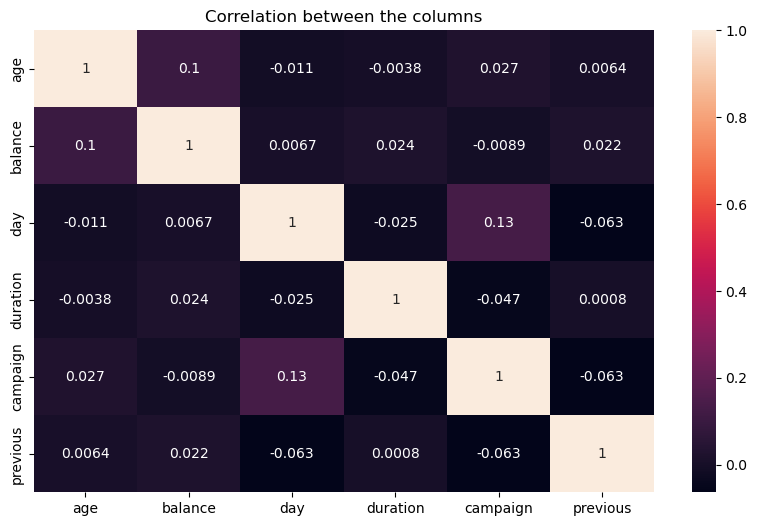

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(bank_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

## Data Preprocessing 

In [136]:
#Splitting the dataframe into feature and target variables
bank_1

age         job   marital  education  balance    contact  day month  \
0       56      admin.   married    unknown     1933  telephone   19   nov   
1       31     unknown   married  secondary        3   cellular   20   jul   
2       27    services   married  secondary      891   cellular   18   jul   
3       57  management  divorced   tertiary     3287   cellular   22   jun   
4       31  technician   married  secondary      119   cellular    4   feb   
...    ...         ...       ...        ...      ...        ...  ...   ...   
31641   37  technician    single   tertiary     1309    unknown    6   jun   
31642   29  management    single   tertiary        0   cellular   12   may   
31643   53  management  divorced   tertiary      380   cellular    5   jun   
31644   32  management    single   tertiary      312   cellular    7   aug   
31646   55  management  divorced  secondary      204   cellular   11   jul   

       duration  campaign  previous poutcome  housing_new  loan_new  \
0            44         2         0  unknown            0         0   
1            91         2         0  unknown            0         0   
2           240         1         0  unknown            1         0   
3           867         1         3  success            0         0   
4           380         1         0  unknown            1         0   
...         ...       ...       ...      ...          ...       ...   
31641       442         2         0  unknown            0         0   
31642       116         2         0  unknown            1         0   
31643       438         2         0  unknown            0         1   
31644        37         3         0  unknown            0         0   
31646      1973         2         0  unknown            1         0   

       subscribed_new  
0                   0  
1                   0  
2                   0  
3                   1  
4                   0  
...               ...  
31641               0  
31642               0  
31643               1  
31644               0  
31646               1  

[30640 rows x 15 columns]

-- Label Encoding

In [72]:
#One-hot Encoding and Label Encoding for categorical columns
categorical_features = [feature for feature in bank_1.columns if ((bank_1[feature].dtypes=='O') and (feature not in ['subscribed']))]
categorical_features

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [133]:
cat_col = ['job','marital','education','contact','month','poutcome']
bank_encoded = pd.get_dummies(bank_1,columns=cat_col)
print (bank_encoded)

       age  balance  day  duration  campaign  previous  housing_new  loan_new  \
0       56     1933   19        44         2         0            0         0   
1       31        3   20        91         2         0            0         0   
2       27      891   18       240         1         0            1         0   
3       57     3287   22       867         1         3            0         0   
4       31      119    4       380         1         0            1         0   
...    ...      ...  ...       ...       ...       ...          ...       ...   
31641   37     1309    6       442         2         0            0         0   
31642   29        0   12       116         2         0            1         0   
31643   53      380    5       438         2         0            0         1   
31644   32      312    7        37         3         0            0         0   
31646   55      204   11      1973         2         0            1         0   

       subscribed_new  job_

In [134]:
bank_encoded

age  balance  day  duration  campaign  previous  housing_new  loan_new  \
0       56     1933   19        44         2         0            0         0   
1       31        3   20        91         2         0            0         0   
2       27      891   18       240         1         0            1         0   
3       57     3287   22       867         1         3            0         0   
4       31      119    4       380         1         0            1         0   
...    ...      ...  ...       ...       ...       ...          ...       ...   
31641   37     1309    6       442         2         0            0         0   
31642   29        0   12       116         2         0            1         0   
31643   53      380    5       438         2         0            0         1   
31644   32      312    7        37         3         0            0         0   
31646   55      204   11      1973         2         0            1         0   

       subscribed_new  job_admin.  ...  month_jun  month_mar  month_may  \
0                   0           1  ...          0          0          0   
1                   0           0  ...          0          0          0   
2                   0           0  ...          0          0          0   
3                   1           0  ...          1          0          0   
4                   0           0  ...          0          0          0   
...               ...         ...  ...        ...        ...        ...   
31641               0           0  ...          1          0          0   
31642               0           0  ...          0          0          1   
31643               1           0  ...          1          0          0   
31644               0           0  ...          0          0          0   
31646               1           0  ...          0          0          0   

       month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0              1          0          0                 0               0   
1              0          0          0                 0               0   
2              0          0          0                 0               0   
3              0          0          0                 0               0   
4              0          0          0                 0               0   
...          ...        ...        ...               ...             ...   
31641          0          0          0                 0               0   
31642          0          0          0                 0               0   
31643          0          0          0                 0               0   
31644          0          0          0                 0               0   
31646          0          0          0                 0               0   

       poutcome_success  poutcome_unknown  
0                     0                 1  
1                     0                 1  
2                     0                 1  
3                     1                 0  
4                     0                 1  
...                 ...               ...  
31641                 0                 1  
31642                 0                 1  
31643                 0                 1  
31644                 0                 1  
31646                 0                 1  

[30640 rows x 47 columns]

In [ ]:
bool_columns = ['housing','loan','subscribed']
for i in bool_columns:
    bank_1[i+'_new'] = bank_1[i].apply(lambda x : 1 if x == 'yes' else 0)
    bank_1.drop(i,axis=1,inplace=True)

In [118]:
bank_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30640 entries, 0 to 31646
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  30640 non-null  int64
 1   balance              30640 non-null  int64
 2   day                  30640 non-null  int64
 3   duration             30640 non-null  int64
 4   campaign             30640 non-null  int64
 5   previous             30640 non-null  int64
 6   housing_new          30640 non-null  int64
 7   loan_new             30640 non-null  int64
 8   subscribed_new       30640 non-null  int64
 9   job_admin.           30640 non-null  uint8
 10  job_blue-collar      30640 non-null  uint8
 11  job_entrepreneur     30640 non-null  uint8
 12  job_housemaid        30640 non-null  uint8
 13  job_management       30640 non-null  uint8
 14  job_retired          30640 non-null  uint8
 15  job_self-employed    30640 non-null  uint8
 16  job_services         3

In [138]:
bank_encoded

age  balance  day  duration  campaign  previous  housing_new  loan_new  \
0       56     1933   19        44         2         0            0         0   
1       31        3   20        91         2         0            0         0   
2       27      891   18       240         1         0            1         0   
3       57     3287   22       867         1         3            0         0   
4       31      119    4       380         1         0            1         0   
...    ...      ...  ...       ...       ...       ...          ...       ...   
31641   37     1309    6       442         2         0            0         0   
31642   29        0   12       116         2         0            1         0   
31643   53      380    5       438         2         0            0         1   
31644   32      312    7        37         3         0            0         0   
31646   55      204   11      1973         2         0            1         0   

       subscribed_new  job_admin.  ...  month_jun  month_mar  month_may  \
0                   0           1  ...          0          0          0   
1                   0           0  ...          0          0          0   
2                   0           0  ...          0          0          0   
3                   1           0  ...          1          0          0   
4                   0           0  ...          0          0          0   
...               ...         ...  ...        ...        ...        ...   
31641               0           0  ...          1          0          0   
31642               0           0  ...          0          0          1   
31643               1           0  ...          1          0          0   
31644               0           0  ...          0          0          0   
31646               1           0  ...          0          0          0   

       month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0              1          0          0                 0               0   
1              0          0          0                 0               0   
2              0          0          0                 0               0   
3              0          0          0                 0               0   
4              0          0          0                 0               0   
...          ...        ...        ...               ...             ...   
31641          0          0          0                 0               0   
31642          0          0          0                 0               0   
31643          0          0          0                 0               0   
31644          0          0          0                 0               0   
31646          0          0          0                 0               0   

       poutcome_success  poutcome_unknown  
0                     0                 1  
1                     0                 1  
2                     0                 1  
3                     1                 0  
4                     0                 1  
...                 ...               ...  
31641                 0                 1  
31642                 0                 1  
31643                 0                 1  
31644                 0                 1  
31646                 0                 1  

[30640 rows x 47 columns]

In [139]:
bank_encoded.groupby(['subscribed_new','campaign'],sort=True)['campaign'].count()

subscribed_new  campaign
0               1           10400
                2            7714
                3            3392
                4            2189
                5            1123
                6             817
                7             472
                8             331
                9             220
                10            171
                11            114
                12            100
1               1            1739
                2             974
                3             403
                4             224
                5              95
                6              68
                7              34
                8              21
                9              15
                10             11
                11             11
                12              2
Name: campaign, dtype: int64

In [140]:
bank_encoded.groupby(['subscribed_new','previous']).size()

subscribed_new  previous
0               0           22972
                1            1499
                2            1153
                3             580
                4             382
                5             227
                6             128
                7             102
1               0            2349
                1             422
                2             327
                3             200
                4             119
                5              84
                6              60
                7              36
dtype: int64

In [144]:
#Splitting the dataframe into feature and target variables
bank_encoded

age  balance  day  duration  campaign  previous  housing_new  loan_new  \
0       56     1933   19        44         2         0            0         0   
1       31        3   20        91         2         0            0         0   
2       27      891   18       240         1         0            1         0   
3       57     3287   22       867         1         3            0         0   
4       31      119    4       380         1         0            1         0   
...    ...      ...  ...       ...       ...       ...          ...       ...   
31641   37     1309    6       442         2         0            0         0   
31642   29        0   12       116         2         0            1         0   
31643   53      380    5       438         2         0            0         1   
31644   32      312    7        37         3         0            0         0   
31646   55      204   11      1973         2         0            1         0   

       subscribed_new  job_admin.  ...  month_jun  month_mar  month_may  \
0                   0           1  ...          0          0          0   
1                   0           0  ...          0          0          0   
2                   0           0  ...          0          0          0   
3                   1           0  ...          1          0          0   
4                   0           0  ...          0          0          0   
...               ...         ...  ...        ...        ...        ...   
31641               0           0  ...          1          0          0   
31642               0           0  ...          0          0          1   
31643               1           0  ...          1          0          0   
31644               0           0  ...          0          0          0   
31646               1           0  ...          0          0          0   

       month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0              1          0          0                 0               0   
1              0          0          0                 0               0   
2              0          0          0                 0               0   
3              0          0          0                 0               0   
4              0          0          0                 0               0   
...          ...        ...        ...               ...             ...   
31641          0          0          0                 0               0   
31642          0          0          0                 0               0   
31643          0          0          0                 0               0   
31644          0          0          0                 0               0   
31646          0          0          0                 0               0   

       poutcome_success  poutcome_unknown  
0                     0                 1  
1                     0                 1  
2                     0                 1  
3                     1                 0  
4                     0                 1  
...                 ...               ...  
31641                 0                 1  
31642                 0                 1  
31643                 0                 1  
31644                 0                 1  
31646                 0                 1  

[30640 rows x 47 columns]

In [145]:
y = bank_encoded['subscribed_new']
y

0        0
1        0
2        0
3        1
4        0
        ..
31641    0
31642    0
31643    1
31644    0
31646    1
Name: subscribed_new, Length: 30640, dtype: int64

In [261]:
y.value_counts()

0    27043
1     3597
Name: subscribed_new, dtype: int64

In [151]:
x = bank_encoded.drop("subscribed_new",axis=1)
x

age  balance  day  duration  campaign  previous  housing_new  loan_new  \
0       56     1933   19        44         2         0            0         0   
1       31        3   20        91         2         0            0         0   
2       27      891   18       240         1         0            1         0   
3       57     3287   22       867         1         3            0         0   
4       31      119    4       380         1         0            1         0   
...    ...      ...  ...       ...       ...       ...          ...       ...   
31641   37     1309    6       442         2         0            0         0   
31642   29        0   12       116         2         0            1         0   
31643   53      380    5       438         2         0            0         1   
31644   32      312    7        37         3         0            0         0   
31646   55      204   11      1973         2         0            1         0   

       job_admin.  job_blue-collar  ...  month_jun  month_mar  month_may  \
0               1                0  ...          0          0          0   
1               0                0  ...          0          0          0   
2               0                0  ...          0          0          0   
3               0                0  ...          1          0          0   
4               0                0  ...          0          0          0   
...           ...              ...  ...        ...        ...        ...   
31641           0                0  ...          1          0          0   
31642           0                0  ...          0          0          1   
31643           0                0  ...          1          0          0   
31644           0                0  ...          0          0          0   
31646           0                0  ...          0          0          0   

       month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0              1          0          0                 0               0   
1              0          0          0                 0               0   
2              0          0          0                 0               0   
3              0          0          0                 0               0   
4              0          0          0                 0               0   
...          ...        ...        ...               ...             ...   
31641          0          0          0                 0               0   
31642          0          0          0                 0               0   
31643          0          0          0                 0               0   
31644          0          0          0                 0               0   
31646          0          0          0                 0               0   

       poutcome_success  poutcome_unknown  
0                     0                 1  
1                     0                 1  
2                     0                 1  
3                     1                 0  
4                     0                 1  
...                 ...               ...  
31641                 0                 1  
31642                 0                 1  
31643                 0                 1  
31644                 0                 1  
31646                 0                 1  

[30640 rows x 46 columns]

In [152]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x))

In [153]:
X

0         1         2         3         4         5         6   \
0      1.414977  0.187311  0.393861 -0.841107 -0.229996 -0.373513 -1.116541   
1     -0.937845 -0.449572  0.514312 -0.658438 -0.229996 -0.373513 -1.116541   
2     -1.314297 -0.156540  0.273409 -0.079336 -0.749538 -0.373513  0.895623   
3      1.509090  0.634120  0.755214  2.357557 -0.749538  2.293360 -1.116541   
4     -0.937845 -0.411293 -1.412908  0.464787 -0.749538 -0.373513  0.895623   
...         ...       ...       ...       ...       ...       ...       ...   
30635 -0.373168 -0.018603 -1.172005  0.705756 -0.229996 -0.373513 -1.116541   
30636 -1.126071 -0.450562 -0.449298 -0.561273 -0.229996 -0.373513  0.895623   
30637  1.132638 -0.325166 -1.292457  0.690209 -0.229996 -0.373513 -1.116541   
30638 -0.843733 -0.347605 -1.051554 -0.868313  0.289546 -0.373513 -1.116541   
30639  1.320864 -0.383244 -0.569749  6.656126 -0.229996 -0.373513  0.895623   

             7        8         9   ...        36        37        38  \
0     -0.439379  2.78017 -0.525131  ... -0.364476 -0.104822 -0.667602   
1     -0.439379 -0.35969 -0.525131  ... -0.364476 -0.104822 -0.667602   
2     -0.439379 -0.35969 -0.525131  ... -0.364476 -0.104822 -0.667602   
3     -0.439379 -0.35969 -0.525131  ...  2.743664 -0.104822 -0.667602   
4     -0.439379 -0.35969 -0.525131  ... -0.364476 -0.104822 -0.667602   
...         ...      ...       ...  ...       ...       ...       ...   
30635 -0.439379 -0.35969 -0.525131  ...  2.743664 -0.104822 -0.667602   
30636 -0.439379 -0.35969 -0.525131  ... -0.364476 -0.104822  1.497899   
30637  2.275942 -0.35969 -0.525131  ...  2.743664 -0.104822 -0.667602   
30638 -0.439379 -0.35969 -0.525131  ... -0.364476 -0.104822 -0.667602   
30639 -0.439379 -0.35969 -0.525131  ... -0.364476 -0.104822 -0.667602   

             39        40        41       42        43        44        45  
0      3.197412 -0.128143 -0.113693 -0.34054 -0.195594 -0.183775  0.458065  
1     -0.312753 -0.128143 -0.113693 -0.34054 -0.195594 -0.183775  0.458065  
2     -0.312753 -0.128143 -0.113693 -0.34054 -0.195594 -0.183775  0.458065  
3     -0.312753 -0.128143 -0.113693 -0.34054 -0.195594  5.441451 -2.183094  
4     -0.312753 -0.128143 -0.113693 -0.34054 -0.195594 -0.183775  0.458065  
...         ...       ...       ...      ...       ...       ...       ...  
30635 -0.312753 -0.128143 -0.113693 -0.34054 -0.195594 -0.183775  0.458065  
30636 -0.312753 -0.128143 -0.113693 -0.34054 -0.195594 -0.183775  0.458065  
30637 -0.312753 -0.128143 -0.113693 -0.34054 -0.195594 -0.183775  0.458065  
30638 -0.312753 -0.128143 -0.113693 -0.34054 -0.195594 -0.183775  0.458065  
30639 -0.312753 -0.128143 -0.113693 -0.34054 -0.195594 -0.183775  0.458065  

[30640 rows x 46 columns]

In [262]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X1,y1 = sm.fit_resample(X,y)

In [263]:
y1.value_counts()

0    27043
1    27043
Name: subscribed_new, dtype: int64

In [264]:
# Now, Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.30)

In [265]:
print("X_train ",X_train.shape)
print("y_train ",y_train.shape)
print("X_test ",X_test.shape)
print("y_test ",y_test.shape)

X_train  (37860, 46)
y_train  (37860,)
X_test  (16226, 46)
y_test  (16226,)


## Model Training 

#### Logistic Regression 

In [266]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [267]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test,logreg_pred)
print('Test accuracy is: {:.2f}%'.format(logreg_acc*100))

Test accuracy is: 84.87%


In [268]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      8183
           1       0.85      0.84      0.85      8043

    accuracy                           0.85     16226
   macro avg       0.85      0.85      0.85     16226
weighted avg       0.85      0.85      0.85     16226



In [269]:
a = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[6981 1202]
 [1253 6790]]
TN:  6981
FN:  1253
TP:  6790
FP:  1202


#### Decision Tree Classifier 

In [270]:
#importing necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [271]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(dtree_acc*100))

Test accuracy is: 90.85%


In [272]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      8183
           1       0.90      0.91      0.91      8043

    accuracy                           0.91     16226
   macro avg       0.91      0.91      0.91     16226
weighted avg       0.91      0.91      0.91     16226



In [273]:
a = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[7386  797]
 [ 687 7356]]
TN:  7386
FN:  687
TP:  7356
FP:  797


#### Random Forest Classifier 

In [274]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [302]:
r_f = RandomForestClassifier()
r_f.fit(X_train,y_train)
r_f_pred = r_f.predict(X_test)
r_f_acc = accuracy_score(r_f_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(r_f_acc*100))

Test accuracy is: 94.84%


In [276]:
print(classification_report(y_test,r_f_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8183
           1       0.94      0.96      0.95      8043

    accuracy                           0.95     16226
   macro avg       0.95      0.95      0.95     16226
weighted avg       0.95      0.95      0.95     16226



In [277]:
a = confusion_matrix(y_test, r_f_pred, labels=r_f.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[7664  519]
 [ 282 7761]]
TN:  7664
FN:  282
TP:  7761
FP:  519


#### Naive Bayes Classifier  

In [278]:
from sklearn.naive_bayes import GaussianNB

In [279]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(nb_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(nb_acc*100))

Test accuracy is: 72.01%


In [280]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76      8183
           1       0.83      0.55      0.66      8043

    accuracy                           0.72     16226
   macro avg       0.75      0.72      0.71     16226
weighted avg       0.75      0.72      0.71     16226



In [281]:
a = confusion_matrix(y_test, nb_pred, labels=nb.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[7298  885]
 [3656 4387]]
TN:  7298
FN:  3656
TP:  4387
FP:  885


#### Support Vector Classifier 

In [282]:
from sklearn.svm import SVC

In [283]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(svc_acc*100))

Test accuracy is: 90.80%


In [284]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.90      8183
           1       0.88      0.95      0.91      8043

    accuracy                           0.91     16226
   macro avg       0.91      0.91      0.91     16226
weighted avg       0.91      0.91      0.91     16226



In [285]:
a = confusion_matrix(y_test, svc_pred, labels=svc.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[7098 1085]
 [ 407 7636]]
TN:  7098
FN:  407
TP:  7636
FP:  1085


#### K - nearest neighbour Classifier 

In [286]:
from sklearn.neighbors import KNeighborsClassifier

In [287]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(knn_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(knn_acc*100))

Test accuracy is: 90.56%


In [288]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8183
           1       0.85      0.98      0.91      8043

    accuracy                           0.91     16226
   macro avg       0.91      0.91      0.91     16226
weighted avg       0.92      0.91      0.91     16226



In [289]:
a = confusion_matrix(y_test, knn_pred, labels=knn.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[6795 1388]
 [ 144 7899]]
TN:  6795
FN:  144
TP:  7899
FP:  1388


### Cross Validation Score 

In [180]:
#Applying Cross validation score for top 3 models
from sklearn.model_selection import cross_val_score

In [290]:
#Decision Tree Classifier
score = cross_val_score(dtree,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,logreg_pred) - score.mean())

[0.81724903 0.92382361 0.92816862 0.9320514  0.92299159]
0.9048568503461331
Difference between Accuracy score and cross validation score is -  -0.056157232448931005


In [291]:
#Random Forest Classifier
score = cross_val_score(r_f,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,r_f_pred) - score.mean())

[0.88269551 0.96385319 0.96144957 0.96542479 0.96135712]
0.9469560378014702
Difference between Accuracy score and cross validation score is -  0.0036787458790425998


In [292]:
#Support Vector Classifier 
score = cross_val_score(svc,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,svc_pred) - score.mean())

[0.8944352  0.91356199 0.91467135 0.91032634 0.91041879]
0.9086827320846707
Difference between Accuracy score and cross validation score is -  -0.000633921533703119


-- As the mean value of cross val score of a Random Forest Classifier is more than the other two and also the cross val scores across k=5 folds is more consistent in Random Forest Classifier model..Therefore we shall be choosing Random Forest Classifier as our model..

#### Hyperparameter Tuning 

In [293]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {'n_estimators':randint(50,1000),'max_depth':[None,10,20,30,40,50],'min_samples_split':[2,5,10,20,40,60]}
rf = RandomForestClassifier()
random_search = RandomizedSearchCV(rf,param_distributions=param_dist,scoring='accuracy',cv=5)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_split': [2, 5, 10, 20, 40,
                                                              60],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B1B0516680>},
                   scoring='accuracy')

In [294]:
random_search.best_params_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 631}

In [295]:
random_search.best_score_

0.9380084521922873

In [301]:
Final_model = RandomForestClassifier(max_depth = 40, min_samples_split = 2, n_estimators = 631)
Final_model.fit(X_train,y_train)
fm_pred = Final_model.predict(X_test)
fm_acc = accuracy_score(fm_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(fm_acc*100))

Test accuracy is: 95.03%


### Plotting AUC-ROC curve for the final model 

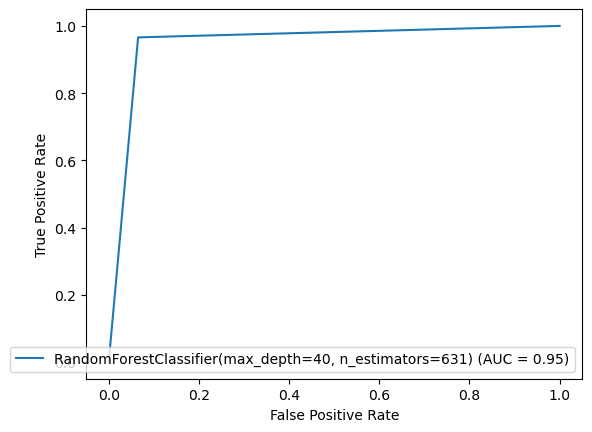

In [303]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,fm_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

### Saving the best model 

In [304]:
import joblib
joblib.dump(Final_model,"bank_marketing_prediction_project_1.pkl")

['bank_marketing_prediction_project_1.pkl']